<a href="https://colab.research.google.com/github/LatiefDataVisionary/demand-forecasting-retail-college-task/blob/main/notebooks/complete_tpm_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demand Forecasting for Retail: A Machine Learning Pipeline Approach**

## **Project Overview**

**College Course:** Model Development Engineering

**Objective:** To develop a robust machine learning model to accurately forecast daily product demand for a retail company. This involves a comprehensive data pipeline, including merging multiple data sources, extensive feature engineering, and model comparison to optimize inventory management and reduce costs.

## **Tentang Dataset**

Fondasi dari proyek pemodelan prediktif ini adalah integrasi strategis dari tiga dataset yang berbeda namun saling melengkapi. Dengan menggabungkan sumber-sumber ini, kami bertujuan untuk menciptakan pandangan holistik tentang lingkungan ritel, menangkap segalanya mulai dari transaksi harian yang terperinci dan tingkat inventaris hingga upaya pemasaran yang lebih luas dan sinyal ekonomi makro. Pendekatan komprehensif ini sangat penting untuk membangun model peramalan permintaan yang kuat dan akurat.

Setiap dataset memainkan peran spesifik dan krusial dalam memperkaya dataset master akhir kami:


### **1. Retail Store Inventory and Demand Forecasting (Data Transaksional Inti)**

**Tautan:** [Kaggle Dataset](https://www.kaggle.com/datasets/atomicd/retail-store-inventory-and-demand-forecasting)

Dataset ini berfungsi sebagai **tabel dasar atau utama** untuk proyek kami. Ini menyediakan data transaksional dan operasional inti pada tingkat paling granular: aktivitas penjualan harian untuk setiap produk di setiap toko. Ini berisi sinyal utama perilaku pelanggan dan, yang paling penting, variabel target kami untuk prediksi.

**Peran dalam Proyek:**


Ini adalah sumber kebenaran utama kami untuk penjualan dan permintaan. Kami akan menggunakannya sebagai tabel utama tempat semua informasi lain akan digabungkan. Catatan hariannya yang terperinci sangat cocok untuk rekayasa fitur deret waktu (misalnya, membuat lag dan rata-rata bergulir).

**Fitur Utama yang Dimanfaatkan:**
- `Date`, `Store ID`, `Product ID`:

    Kunci utama yang digunakan untuk menggabungkan dan melacak kinerja di berbagai segmen.
- **`Demand` (Variabel Target):**

    Perkiraan permintaan harian untuk setiap produk, yang ingin diprediksi oleh model kami.
- `Units Sold`, `Inventory Level`:

    Indikator internal kritis kinerja stok dan kecepatan penjualan.
- `Price`, `Discount`, `Promotion`:

    Tuas keuangan utama yang secara langsung memengaruhi keputusan pembelian pelanggan.
- `Weather Condition`, `Seasonality`:

    Faktor eksternal yang membantu model memahami pola penjualan kontekstual.
- `Competitor Pricing`:

    Memberikan gambaran tentang lanskap kompetitif.
- `Epidemic`:
    Bendera biner unik untuk membantu model belajar dari periode gangguan pasar yang signifikan, seperti pandemi.


### **2. Retail Sales Data with Seasonal Trends & Marketing (Data Konteks Pemasaran)**

**Tautan:** [Kaggle Dataset](https://www.kaggle.com/datasets/abdullah0a/retail-sales-data-with-seasonal-trends-and-marketing)

Sementara dataset pertama kami menyediakan detail operasional, dataset kedua ini menawarkan pandangan tingkat yang lebih tinggi tentang lingkungan pemasaran dan penjualan. Kontribusi utamanya adalah penyertaan pengeluaran pemasaran, memungkinkan model kami untuk mengukur dampak upaya periklanan terhadap penjualan.

**Peran dalam Proyek:**

Untuk memperkaya dataset master kami dengan intelijen pemasaran yang krusial. Dengan menggabungkan data ini, kami dapat menganalisis laba atas investasi untuk kampanye pemasaran dan memahami bagaimana pengeluaran pemasaran, bersama dengan faktor-faktor lain seperti hari libur dan diskon, mendorong permintaan.

**Fitur Utama yang Dimanfaatkan:**
- **`Marketing Spend (USD)`:**

    Fitur paling berharga dari dataset ini, memberikan ukuran langsung dari investasi pemasaran.
- `Sales Revenue (USD)`:

    Dapat digunakan untuk validasi atau sebagai fitur tambahan untuk menangkap nilai moneter penjualan.
- `Holiday Effect`:

    Indikator biner yang berguna untuk membantu model memahami peningkatan penjualan selama periode liburan.
- `Store Location`, `Product Category`:

    Memberikan dimensi tambahan untuk segmentasi dan analisis.


### **3. Strategic Supply Chain Demand Forecasting Dataset (Data Ekonomi & Kompetitif Eksternal)**

**Tautan:** [Kaggle Dataset](https://www.kaggle.com/datasets/ziya07/strategic-supply-chain-demand-forecasting-dataset)

Dataset terakhir ini menyediakan lapisan konteks ekonomi makro dan kompetitif. Ini mensimulasikan data dari perusahaan furnitur dan menyertakan indeks berharga yang mewakili faktor-faktor di luar kendali langsung toko ritel tunggal, seperti kesehatan ekonomi secara keseluruhan.

**Peran dalam Proyek:**

Untuk memberikan model kami sinyal eksternal yang memengaruhi daya beli dan perilaku konsumen secara keseluruhan. Fitur-fitur ini membantu model memahami kondisi pasar yang lebih luas, membuatnya lebih tangguh dan mudah beradaptasi terhadap pergeseran ekonomi. Dataset ini sangat berharga karena berisi fitur-fitur yang telah diproses sebelumnya dan siap model.

**Fitur Utama yang Dimanfaatkan:**
- **`economic_index`:**

    Fitur kuat yang mewakili kekuatan ekonomi. Indeks yang lebih tinggi menunjukkan kondisi ekonomi yang lebih kuat, yang biasanya berkorelasi dengan penjualan ritel yang lebih tinggi.
- **`competitor_price_index`:**

    Indeks yang mewakili harga relatif pesaing, memberikan pandangan yang lebih abstrak tentang lingkungan kompetitif daripada harga pesaing tunggal.
- Bendera Boolean yang Telah Diproses Sebelumnya:

    Fitur seperti `region_Europe`, `store_type_Retail`, dan `category_Chairs` menyediakan atribut yang berguna dan sudah dikodekan.

**Catatan Penting:**

    
Dataset ini berisi kolom bernama `future_demand`, yang tampaknya merupakan variabel target untuk kasus penggunaan aslinya. Untuk mencegah **kebocoran data (data leakage)**, kolom ini akan dihapus dari `master_df` kami. Tujuan proyek kami adalah untuk memprediksi variabel `Demand` dari dataset pertama.

Dengan menggabungkan ketiga sumber ini, kami membangun DataFrame master tunggal yang komprehensif. Dataset terpadu ini memungkinkan model kami untuk belajar dari berbagai sinyal—mulai dari tingkat stok internal dan promosi hingga penetapan harga pesaing dan tren ekonomi makro—membuka jalan bagi solusi peramalan yang lebih akurat dan kuat.

## **Chapter 1: Project Setup (Pengaturan Proyek)**

Bab ini mencakup pengaturan awal, termasuk mengimpor library yang diperlukan dan memuat dataset dari sumbernya.

### **1.1. Import Libraries**

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# Set plotting style
sns.set_style("whitegrid")

Kode di atas mengimpor library Python yang akan digunakan sepanjang proyek ini:

*   **`pandas`**: Library utama untuk manipulasi dan analisis data, terutama untuk bekerja dengan DataFrame. Diimpor dengan alias `pd`.
*   **`numpy`**: Library untuk komputasi numerik, sangat berguna untuk operasi array dan matematika. Diimpor dengan alias `np`.
*   **`matplotlib.pyplot`**: Library untuk membuat visualisasi statis di Python. Diimpor dengan alias `plt`.
*   **`seaborn`**: Library visualisasi data tingkat tinggi berdasarkan matplotlib, menyediakan antarmuka yang lebih menarik dan informatif. Diimpor dengan alias `sns`.
*   **`sklearn.model_selection.train_test_split`**: Fungsi untuk membagi dataset menjadi subset pelatihan dan pengujian.
*   **`sklearn.preprocessing.StandardScaler`**: Digunakan untuk menstandarisasi fitur dengan menghapus rata-rata dan menskalakan ke varian unit.
*   **`sklearn.preprocessing.OneHotEncoder`**: Digunakan untuk mengonversi fitur kategorikal menjadi format one-hot numerik.
*   **`sklearn.compose.ColumnTransformer`**: Memungkinkan penerapan transformer yang berbeda ke kolom data yang berbeda.
*   **`sklearn.pipeline.Pipeline`**: Memungkinkan pembuatan pipeline kerja yang menggabungkan beberapa langkah preprocessing dan estimasi.
*   **`sklearn.metrics.mean_squared_error`**, **`sklearn.metrics.mean_absolute_error`**: Metrik evaluasi untuk model regresi.
*   **`xgboost`**: Library untuk implementasi Extreme Gradient Boosting (XGBoost), algoritma machine learning yang populer dan efisien. Diimpor dengan alias `xgb`.

Baris `sns.set_style("whitegrid")` mengatur gaya plot default untuk seaborn, memberikan latar belakang putih dengan grid.

### **1.2. Load Datasets**

In [174]:
data1 = 'https://raw.githubusercontent.com/LatiefDataVisionary/demand-forecasting-retail-college-task/refs/heads/main/data/raw/Dataset%201_Retail%20Store%20Inventory%20and%20Demand%20Forecasting.csv'
data2 = 'https://raw.githubusercontent.com/LatiefDataVisionary/demand-forecasting-retail-college-task/refs/heads/main/data/raw/Dataset%202_Retail%20Sales%20Data%20with%20Seasonal%20Trends%20%26%20Marketing.csv'
data3 = 'https://raw.githubusercontent.com/LatiefDataVisionary/demand-forecasting-retail-college-task/refs/heads/main/data/raw/Dataset%203_Strategic%20Supply%20Chain%20Demand%20Forecasting%20Dataset.csv'

df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)
df3 = pd.read_csv(data3)

print("df1 loaded successfully.")
print("df2 loaded successfully.")
print("df3 loaded successfully.")

df1 loaded successfully.
df2 loaded successfully.
df3 loaded successfully.


Kode di bagian ini bertujuan untuk memuat tiga dataset yang akan digunakan dalam proyek ini dari sumber URL mentah (raw).

1.  **Mendefinisikan URL Dataset**

    Tiga variabel string (`data1`, `data2`, `data3`) dibuat untuk menyimpan URL dari file CSV yang berada di repositori GitHub. Menggunakan URL mentah dari GitHub memungkinkan kode untuk langsung mengakses file data.
2.  **Memuat Dataset ke DataFrame:**

    Fungsi `pd.read_csv()` dari library pandas digunakan untuk membaca data dari setiap URL.
    *   `df1 = pd.read_csv(data1)`: Memuat data dari URL di `data1` ke dalam DataFrame bernama `df1`.
    *   `df2 = pd.read_csv(data2)`: Memuat data dari URL di `data2` ke dalam DataFrame bernama `df2`.
    *   `df3 = pd.read_csv(data3)`: Memuat data dari URL di `data3` ke dalam DataFrame bernama `df3`.
3.  **Konfirmasi Pemuatan:**

    Mencetak pesan konfirmasi untuk setiap dataset setelah berhasil dimuat. Ini membantu memverifikasi bahwa proses pemuatan berjalan tanpa kesalahan.

Setelah kode ini dijalankan, tiga DataFrame (`df1`, `df2`, dan `df3`) akan tersedia di lingkungan kerja, berisi data dari masing-masing file CSV.

#### **1.2.1. Data Information**

In [175]:
df1.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [176]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [177]:
df2.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [179]:
df3.head()

,date,product_id,sales_units,holiday_season,promotion_applied,competitor_price_index,economic_index,weather_impact,price,discount_percentage,sales_revenue,region_Europe,region_North America,store_type_Retail,store_type_Wholesale,category_Cabinets,category_Chairs,category_Sofas,category_Tables,future_demand
0,2023-01-01,151,99,0,0,0.983893,1.314333,0,126.932922,0.000000,12566.359326,False,False,True,False,False,True,False,False,95.0
1,2023-01-02,192,95,1,0,0.977615,1.439582,0,151.355405,0.000000,14378.763512,False,True,False,False,True,False,False,False,101.0
2,2023-01-03,114,101,0,0,0.983913,1.094795,0,191.701693,0.000000,19361.870952,False,False,False,True,True,False,False,False,33.0
3,2023-01-04,171,33,0,0,1.191956,0.907672,0,173.106487,0.000000,5712.514059,False,False,False,True,False,True,False,False,82.0
4,2023-01-05,160,82,0,1,0.855711,1.479690,0,138.587491,10.995213,10114.659145,True,False,False,False,False,False,True,False,13.0


In [180]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    4999 non-null   object 
 1   product_id              4999 non-null   int64  
 2   sales_units             4999 non-null   int64  
 3   holiday_season          4999 non-null   int64  
 4   promotion_applied       4999 non-null   int64  
 5   competitor_price_index  4999 non-null   float64
 6   economic_index          4999 non-null   float64
 7   weather_impact          4999 non-null   int64  
 8   price                   4999 non-null   float64
 9   discount_percentage     4999 non-null   float64
 10  sales_revenue           4999 non-null   float64
 11  region_Europe           4999 non-null   bool   
 12  region_North America    4999 non-null   bool   
 13  store_type_Retail       4999 non-null   bool   
 14  store_type_Wholesale    4999 non-null   

Kode di bagian "1.2.1. Data Information" ini digunakan untuk mendapatkan gambaran awal tentang struktur dan isi dari setiap dataset yang telah dimuat (`df1`, `df2`, dan `df3`).

*   `df1.head()`, `df2.head()`, `df3.head()`:

    Perintah `.head()` menampilkan lima baris pertama dari setiap DataFrame. Ini berguna untuk melihat sekilas data, termasuk nama kolom, tipe data, dan beberapa nilai awal.
*   `df1.info()`, `df2.info()`, `df3.info()`:

    Perintah `.info()` mencetak ringkasan ringkas dari setiap DataFrame. Ini termasuk:
    *   Jumlah entri (baris) dalam DataFrame.
    *   Daftar semua kolom.
    *   Jumlah nilai non-null di setiap kolom, yang membantu mengidentifikasi kolom dengan nilai yang hilang.
    *   Tipe data (dtype) dari setiap kolom (misalnya, int64, float64, object).
    *   Penggunaan memori oleh DataFrame.

Dengan menjalankan kode ini, kita dapat dengan cepat memahami format data, mengidentifikasi potensi masalah seperti nilai yang hilang atau tipe data yang tidak sesuai, dan mempersiapkan langkah-langkah pemrosesan data selanjutnya.

#### **1.2.2. Data Summary Statistics**

In [181]:
df1.describe(include='all')

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
count,76000,76000,76000,76000,76000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000,76000.000000,76000.000000,76000,76000.000000,76000.000000
unique,760,5,20,5,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN
top,2024-01-30,S001,P0001,Groceries,North,NaN,NaN,NaN,NaN,NaN,Cloudy,NaN,NaN,Winter,NaN,NaN
freq,100,15200,3800,30400,30400,NaN,NaN,NaN,NaN,NaN,24360,NaN,NaN,21000,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,301.062842,88.827316,89.090645,67.726028,9.087039,NaN,0.328947,69.454029,NaN,0.200000,104.317158
std,NaN,NaN,NaN,NaN,NaN,226.510161,43.994525,162.404627,39.377899,7.475781,NaN,0.469834,40.943818,NaN,0.400003,46.964801
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.740000,0.000000,NaN,0.000000,4.290000,NaN,0.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,136.000000,58.000000,0.000000,31.997500,5.000000,NaN,0.000000,32.620000,NaN,0.000000,71.000000
50%,NaN,NaN,NaN,NaN,NaN,227.000000,84.000000,0.000000,64.500000,10.000000,NaN,0.000000,65.700000,NaN,0.000000,100.000000
75%,NaN,NaN,NaN,NaN,NaN,408.000000,114.000000,121.000000,95.830000,10.000000,NaN,1.000000,97.932500,NaN,0.000000,133.000000


In [182]:
df2.describe(include='all')

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29967,30000,30000,30000,29999.000000,30000.000000,30000.000000
unique,NaN,NaN,290,15668,15732,8,NaN,NaN,NaN
top,NaN,NaN,"THE COUNTRY VINTNER, LLC DBA WINEBOW",16225,TENTH WARD DIST CO CARAWAY RYE - 750ML,WINE,NaN,NaN,NaN
freq,NaN,NaN,2041,4,5,18680,NaN,NaN,NaN
mean,2020.0,3.911467,NaN,NaN,NaN,NaN,6.939796,6.594058,27.431031
std,0.0,2.836788,NaN,NaN,NaN,NaN,33.081054,27.879428,272.166085
min,2020.0,1.000000,NaN,NaN,NaN,NaN,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2020.0,3.000000,NaN,NaN,NaN,NaN,0.160000,0.000000,1.000000
75%,2020.0,7.000000,NaN,NaN,NaN,NaN,2.920000,3.000000,6.000000


In [183]:
df3.describe(include='all')

,date,product_id,sales_units,holiday_season,promotion_applied,competitor_price_index,economic_index,weather_impact,price,discount_percentage,sales_revenue,region_Europe,region_North America,store_type_Retail,store_type_Wholesale,category_Cabinets,category_Chairs,category_Sofas,category_Tables,future_demand
count,4999,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999,4999,4999,4999,4999,4999,4999,4999,4999.000000
unique,4999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN
top,2036-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3321,3315,3332,3308,3997,4011,4031,3936,NaN
mean,NaN,148.897780,103.287057,0.201240,0.291458,1.000817,1.006562,0.143429,110.942274,5.131256,10868.506476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.293059
std,NaN,28.966902,54.805135,0.400967,0.454480,0.116095,0.287037,0.350545,51.947268,8.879610,8261.926164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.806308
min,NaN,100.000000,10.000000,0.000000,0.000000,0.800081,0.500021,0.000000,20.016788,0.000000,205.710553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,124.000000,56.000000,0.000000,0.000000,0.900912,0.764042,0.000000,66.092894,0.000000,4246.400673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.000000
50%,NaN,148.000000,101.000000,0.000000,0.000000,0.999048,1.010684,0.000000,111.391956,0.000000,8746.124067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.000000
75%,NaN,174.000000,151.000000,0.000000,1.000000,1.102838,1.253165,0.000000,156.397044,8.850384,15700.271472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.000000


Kode di bagian "1.2.2. Data Summary Statistics" ini digunakan untuk menghasilkan ringkasan statistik deskriptif untuk setiap kolom dalam DataFrame.

*   `df1.describe(include='all')`, `df2.describe(include='all')`, `df3.describe(include='all')`:

    Perintah `.describe()` menghasilkan statistik deskriptif. Dengan `include='all'`, ini mencakup kolom bertipe objek (non-numerik) serta kolom numerik. Untuk kolom numerik, output mencakup hitungan (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil (25%, 50%, 75%), dan nilai maksimum (max). Untuk kolom objek, ini mencakup hitungan, jumlah nilai unik (unique), nilai yang paling sering muncul (top), dan frekuensinya (freq).

Ringkasan statistik ini membantu kita memahami distribusi data, rentang nilai, dan mengidentifikasi potensi masalah seperti pencilan (outliers) atau data yang tidak wajar dalam kolom numerik, serta memahami keragaman dan distribusi nilai dalam kolom kategorikal.

#### **1.2.3. Unique Values and Counts for Object Columns**

In [184]:
for col in df1.select_dtypes(include='object').columns:
    print(f"### Column: {col}\n")
    print(f"**Unique Values:**\n{df1[col].unique()}\n")
    print(f"**Value Counts:**\n{df1[col].value_counts().to_markdown(numalign='left', stralign='left')}\n---")

### Column: Date

**Unique Values:**
['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10'
 '2022-01-11' '2022-01-12' '2022-01-13' '2022-01-14' '2022-01-15'
 '2022-01-16' '2022-01-17' '2022-01-18' '2022-01-19' '2022-01-20'
 '2022-01-21' '2022-01-22' '2022-01-23' '2022-01-24' '2022-01-25'
 '2022-01-26' '2022-01-27' '2022-01-28' '2022-01-29' '2022-01-30'
 '2022-01-31' '2022-02-01' '2022-02-02' '2022-02-03' '2022-02-04'
 '2022-02-05' '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09'
 '2022-02-10' '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14'
 '2022-02-15' '2022-02-16' '2022-02-17' '2022-02-18' '2022-02-19'
 '2022-02-20' '2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24'
 '2022-02-25' '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01'
 '2022-03-02' '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06'
 '2022-03-07' '2022-03-08' '2022-03-09' '2022-03-10' '2022-03-11'
 '2022-03-12' '2022-03-13' '2022-03-14'

In [185]:
for col in df2.select_dtypes(include='object').columns:
    print(f"### Column: {col}\n")
    print(f"**Unique Values:**\n{df2[col].unique()}\n")
    print(f"**Value Counts:**\n{df2[col].value_counts().to_markdown(numalign='left', stralign='left')}\n---")

Streaming output truncated to the last 5000 lines.
| FLYING DOG SNAKE DOG IPA 1/6 KEG                                                  | 1       |
| NB RED ROBIN 1969 LAGER 1/2 KEG                                                   | 1       |
| HEAVY SEAS DRINK LIKE A PIRATE SAMPLER 2/12PK CAN 12OZ                            | 1       |
| BUD LIGHT ORANGE 15PK 25OZ CAN                                                    | 1       |
| Q DRINKS INDIAN TONIC NA - 6.7OZ                                                  | 1       |
| DUCK RABBIT PORTER 4/6 NR                                                         | 1       |
| EPIC TART'N JUICY 4/6 12OZ CANS                                                   | 1       |
| CHAMPION SHOWER BEER 4/6 12OZ CANS                                                | 1       |
| SLY FOX HELLES 4/6 12OZ CANS                                                      | 1       |
| ITHACA FLOWER POWER 4/6 CANS                                                      |

In [186]:
for col in df3.select_dtypes(include='object').columns:
    print(f"### Column: {col}\n")
    print(f"**Unique Values:**\n{df3[col].unique()}\n")
    print(f"**Value Counts:**\n{df3[col].value_counts().to_markdown(numalign='left', stralign='left')}\n---")

Streaming output truncated to the last 5000 lines.
| 2036-09-07 | 1       |
| 2023-01-01 | 1       |
| 2023-01-02 | 1       |
| 2023-01-03 | 1       |
| 2023-01-04 | 1       |
| 2023-01-05 | 1       |
| 2023-01-06 | 1       |
| 2036-08-22 | 1       |
| 2036-08-21 | 1       |
| 2036-08-20 | 1       |
| 2036-08-19 | 1       |
| 2036-08-18 | 1       |
| 2036-08-17 | 1       |
| 2036-08-16 | 1       |
| 2036-08-15 | 1       |
| 2036-08-14 | 1       |
| 2036-08-13 | 1       |
| 2036-08-12 | 1       |
| 2036-08-11 | 1       |
| 2036-08-10 | 1       |
| 2036-08-09 | 1       |
| 2036-08-08 | 1       |
| 2036-08-07 | 1       |
| 2023-02-08 | 1       |
| 2023-02-07 | 1       |
| 2023-02-06 | 1       |
| 2023-02-05 | 1       |
| 2023-02-04 | 1       |
| 2023-02-03 | 1       |
| 2023-02-02 | 1       |
| 2023-02-01 | 1       |
| 2023-01-31 | 1       |
| 2023-01-30 | 1       |
| 2023-01-29 | 1       |
| 2023-01-28 | 1       |
| 2023-01-27 | 1       |
| 2023-01-26 | 1       |
| 2023-01-25 | 1       |

Kode di bagian "1.2.3. Unique Values and Counts for Object Columns" ini bertujuan untuk memeriksa nilai unik dan distribusinya (jumlah kemunculan) untuk setiap kolom dalam DataFrame yang bertipe data objek (biasanya string atau kategori).

*   `df.select_dtypes(include='object').columns`: Kode ini memilih semua kolom dalam DataFrame (`df1`, `df2`, `df3`) yang memiliki tipe data objek dan mengembalikan daftar nama kolom tersebut.
*   `for col in ...`: Loop ini mengiterasi melalui setiap nama kolom objek yang telah dipilih.
*   `print(f"### Column: {col}\n")`: Mencetak judul untuk setiap kolom yang sedang dianalisis.
*   `print(f"**Unique Values:**\n{df[col].unique()}\n")`: Mencetak semua nilai unik yang ada dalam kolom saat ini. Ini membantu melihat keragaman nilai dalam kolom kategorikal.
*   `print(f"**Value Counts:**\n{df[col].value_counts().to_markdown(numalign='left', stralign='left')}\n---")`: Mencetak hitungan (frekuensi) untuk setiap nilai unik dalam kolom saat ini. `.value_counts()` menghitung berapa kali setiap nilai muncul, dan `.to_markdown()` memformat output menjadi tabel markdown agar lebih mudah dibaca.

Analisis ini penting untuk memahami konten aktual dalam kolom kategorikal, mengidentifikasi potensi masalah seperti kesalahan pengetikan atau variasi yang tidak terduga, dan mempersiapkan langkah-langkah pengkodean (encoding) fitur kategorikal di kemudian hari.

#### **1.2.4. Missing Values Analysis**

In [187]:
print("Missing values in df:")
print(df1.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nDuplicate rows in df1:")
print(df1.duplicated().sum())

Missing values in df:
|                    | 0   |
|:-------------------|:----|
| Date               | 0   |
| Store ID           | 0   |
| Product ID         | 0   |
| Category           | 0   |
| Region             | 0   |
| Inventory Level    | 0   |
| Units Sold         | 0   |
| Units Ordered      | 0   |
| Price              | 0   |
| Discount           | 0   |
| Weather Condition  | 0   |
| Promotion          | 0   |
| Competitor Pricing | 0   |
| Seasonality        | 0   |
| Epidemic           | 0   |
| Demand             | 0   |

Duplicate rows in df1:
0


In [188]:
print("Missing values in df2:")
print(df2.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nDuplicate rows in df2:")
print(df2.duplicated().sum())

Missing values in df2:
|                  | 0   |
|:-----------------|:----|
| YEAR             | 0   |
| MONTH            | 0   |
| SUPPLIER         | 33  |
| ITEM CODE        | 0   |
| ITEM DESCRIPTION | 0   |
| ITEM TYPE        | 0   |
| RETAIL SALES     | 1   |
| RETAIL TRANSFERS | 0   |
| WAREHOUSE SALES  | 0   |

Duplicate rows in df2:
0


In [189]:
print("Missing values in df3:")
print(df3.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nDuplicate rows in df3:")
print(df3.duplicated().sum())

Missing values in df3:
|                        | 0   |
|:-----------------------|:----|
| date                   | 0   |
| product_id             | 0   |
| sales_units            | 0   |
| holiday_season         | 0   |
| promotion_applied      | 0   |
| competitor_price_index | 0   |
| economic_index         | 0   |
| weather_impact         | 0   |
| price                  | 0   |
| discount_percentage    | 0   |
| sales_revenue          | 0   |
| region_Europe          | 0   |
| region_North America   | 0   |
| store_type_Retail      | 0   |
| store_type_Wholesale   | 0   |
| category_Cabinets      | 0   |
| category_Chairs        | 0   |
| category_Sofas         | 0   |
| category_Tables        | 0   |
| future_demand          | 0   |

Duplicate rows in df3:
0


Kode di bagian "1.2.4. Missing Values Analysis" ini digunakan untuk memeriksa keberadaan nilai yang hilang (missing values) dan baris duplikat (duplicate rows) di setiap DataFrame (`df1`, `df2`, dan `df3`).

*   `df.isnull().sum()`:
    
    Perintah ini menghitung jumlah nilai yang hilang di setiap kolom dalam DataFrame. `.isnull()` membuat DataFrame boolean dengan `True` untuk nilai yang hilang dan `False` sebaliknya, dan `.sum()` menjumlahkan `True` di setiap kolom. `.to_markdown()` memformat output menjadi tabel markdown.
*   `df.duplicated().sum()`:

    Perintah ini menghitung jumlah baris yang sepenuhnya duplikat dalam DataFrame. `.duplicated()` mengembalikan Series boolean yang menunjukkan baris mana yang merupakan duplikat dari baris sebelumnya, dan `.sum()` menjumlahkan `True`.

Analisis nilai yang hilang dan duplikat sangat penting dalam tahap pembersihan data. Nilai yang hilang perlu ditangani (misalnya, dengan mengisi atau menghapus), dan baris duplikat dapat dihapus untuk menghindari bias dalam analisis dan pemodelan. Output dari kode ini menunjukkan jumlah nilai yang hilang per kolom dan jumlah total baris duplikat untuk setiap DataFrame.

#### **1.2.5. Duplicate Values Analysis**

## **Chapter 2: Data Ingestion and Merging (Penyerapan dan Penggabungan Data)**

Langkah pertama dalam pipeline kami adalah mengintegrasikan tiga dataset yang berbeda menjadi satu DataFrame utama yang terpadu yang akan menjadi dasar untuk analisis dan pemodelan kami.

### **2.1. Prepare Datasets for Merging (Persiapan Dataset untuk Penggabungan)**

Standardisasi nama kolom untuk konsistensi sebelum menggabungkan.

In [190]:
# Rename columns in df2 and df3
df2 = df2.rename(columns={'ITEM CODE': 'Product ID'})
df3 = df3.rename(columns={'date': 'Date', 'product_id': 'Product ID'})

# Convert Product ID in df2 to string to match df1 and df3
df2['Product ID'] = df2['Product ID'].astype(str)
df1['Product ID'] = df1['Product ID'].astype(str)
df3['Product ID'] = df3['Product ID'].astype(str)


print("Column names standardized and Product ID data types converted.")

Column names standardized and Product ID data types converted.


Kode di bagian ini bertujuan untuk mempersiapkan tiga dataset (`df1`, `df2`, dan `df3`) sebelum digabungkan. Langkah-langkah yang dilakukan adalah:

1.  **Menyeragamkan Nama Kolom:**
    
    Mengganti nama kolom di `df2` dan `df3` agar sesuai dengan nama kolom di `df1` yang akan digunakan sebagai kunci penggabungan (`merge`). Kolom 'ITEM CODE' di `df2` dan 'product_id' di `df3` diganti menjadi 'Product ID'. Kolom 'date' di `df3` diganti menjadi 'Date'.
2.  **Mengubah Tipe Data Kolom 'Product ID':**
    
    Memastikan bahwa kolom 'Product ID' di ketiga dataset memiliki tipe data yang sama, yaitu string. Ini penting karena penggabungan berdasarkan kolom ini memerlukan tipe data yang konsisten. Kode ini secara eksplisit mengubah tipe data kolom 'Product ID' di `df1`, `df2`, dan `df3` menjadi string.

Dengan menyeragamkan nama kolom dan tipe data 'Product ID', dataset siap untuk digabungkan menjadi satu DataFrame utama.

### **2.2. Merge Datasets (Penggabungan Dataset)**

Melakukan proses penggabungan dua langkah untuk membuat `master_df`.

In [191]:
# Merge df1 with df2
master_df = pd.merge(df1, df2[['Product ID', 'SUPPLIER', 'ITEM TYPE', 'RETAIL SALES']], on='Product ID', how='left')

# Merge the result with df3
master_df = pd.merge(master_df, df3[['Date', 'Product ID', 'holiday_season', 'promotion_applied',
                                     'competitor_price_index', 'economic_index', 'weather_impact',
                                     'price', 'discount_percentage', 'sales_revenue', 'region_Europe',
                                     'region_North America', 'store_type_Retail', 'store_type_Wholesale',
                                     'category_Cabinets', 'category_Chairs', 'category_Sofas',
                                     'category_Tables', 'future_demand']],
                     on=['Date', 'Product ID'], how='left')

print("Datasets merged successfully.")
display(master_df.head())

Datasets merged successfully.


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,...,sales_revenue,region_Europe,region_North America,store_type_Retail,store_type_Wholesale,category_Cabinets,category_Chairs,category_Sofas,category_Tables,future_demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
display(master_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    76000 non-null  object 
 1   Store ID                76000 non-null  object 
 2   Product ID              76000 non-null  object 
 3   Category                76000 non-null  object 
 4   Region                  76000 non-null  object 
 5   Inventory Level         76000 non-null  int64  
 6   Units Sold              76000 non-null  int64  
 7   Units Ordered           76000 non-null  int64  
 8   Price                   76000 non-null  float64
 9   Discount                76000 non-null  int64  
 10  Weather Condition       76000 non-null  object 
 11  Promotion               76000 non-null  int64  
 12  Competitor Pricing      76000 non-null  float64
 13  Seasonality             76000 non-null  object 
 14  Epidemic                76000 non-null

None

Kode di bagian ini melakukan penggabungan (merge) dari tiga DataFrame (`df1`, `df2`, dan `df3`) menjadi satu DataFrame utama yang disebut `master_df`. Proses ini dilakukan dalam dua langkah menggunakan fungsi `pd.merge()`:

1.  **Penggabungan `df1` dengan `df2`:**
    *   `pd.merge(df1, df2[['Product ID', 'SUPPLIER', 'ITEM TYPE', 'RETAIL SALES']], on='Product ID', how='left')`
    *   Menggabungkan `df1` dengan kolom-kolom tertentu dari `df2` (`'Product ID'`, `'SUPPLIER'`, `'ITEM TYPE'`, `'RETAIL SALES'`).
    *   Penggabungan dilakukan berdasarkan kolom `'Product ID'`.
    *   Metode `how='left'` memastikan bahwa semua baris dari `df1` (DataFrame kiri) dipertahankan, dan kolom yang sesuai dari `df2` ditambahkan. Jika tidak ada kecocokan 'Product ID' di `df2`, nilai `NaN` akan muncul untuk kolom dari `df2`.
2.  **Penggabungan hasil dengan `df3`:**
    *   `pd.merge(master_df, df3[['Date', 'Product ID', ...]], on=['Date', 'Product ID'], how='left')`
    *   Menggabungkan hasil penggabungan sebelumnya (yang disimpan kembali di `master_df`) dengan kolom-kolom tertentu dari `df3`.
    *   Penggabungan kali ini dilakukan berdasarkan kombinasi dua kolom: `'Date'` dan `'Product ID'`. Ini karena data di `df3` bersifat harian per produk.
    *   Metode `how='left'` kembali digunakan untuk mempertahankan semua baris dari DataFrame yang dihasilkan dari langkah pertama dan menambahkan kolom yang sesuai dari `df3`. Nilai `NaN` akan muncul jika tidak ada kecocokan kombinasi 'Date' dan 'Product ID' di `df3`.

Hasil akhir dari kedua langkah penggabungan ini adalah `master_df` yang berisi data dari ketiga sumber, disatukan berdasarkan 'Product ID' dan 'Date' (untuk data `df3`). Pesan "Datasets merged successfully." dicetak untuk mengkonfirmasi selesainya proses. `display(master_df.head())` menampilkan beberapa baris pertama dari `master_df` untuk memverifikasi hasilnya.

## **Chapter 3: The 10-Step Data Preparation Pipeline (Pipeline Persiapan Data 10 Langkah)**

Bab ini merinci proses persiapan dan pembersihan data komprehensif 10 langkah yang diperlukan untuk mengubah data mentah yang telah digabungkan menjadi format yang kaya fitur dan siap model.

### **Step 1: Data Cleaning and Type Conversion (Pembersihan Data dan Konversi Tipe)**

Langkah pertama dalam pipeline persiapan data yang komprehensif ini berfokus pada pembersihan awal `master_df` yang telah digabungkan dan memastikan tipe data yang sesuai untuk analisis dan pemodelan lebih lanjut.

**Tujuan Langkah Ini:**

*   Memeriksa struktur dan ringkasan data awal dari `master_df` setelah penggabungan.
*   Mengidentifikasi dan menangani nilai-nilai yang hilang (`NaN`) yang mungkin muncul selama proses penggabungan atau sudah ada di dataset asli.
*   Mengonversi kolom tanggal ke format `datetime` yang tepat untuk ekstraksi fitur berbasis waktu.
*   Memeriksa keberadaan baris duplikat.

In [193]:
# Inspect the Master DataFrame
print("Info of master_df:")
master_df.info()

Info of master_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    76000 non-null  object 
 1   Store ID                76000 non-null  object 
 2   Product ID              76000 non-null  object 
 3   Category                76000 non-null  object 
 4   Region                  76000 non-null  object 
 5   Inventory Level         76000 non-null  int64  
 6   Units Sold              76000 non-null  int64  
 7   Units Ordered           76000 non-null  int64  
 8   Price                   76000 non-null  float64
 9   Discount                76000 non-null  int64  
 10  Weather Condition       76000 non-null  object 
 11  Promotion               76000 non-null  int64  
 12  Competitor Pricing      76000 non-null  float64
 13  Seasonality             76000 non-null  object 
 14  Epidemic           

In [194]:
print("\nHead of master_df:")
display(master_df.head())


Head of master_df:


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,...,sales_revenue,region_Europe,region_North America,store_type_Retail,store_type_Wholesale,category_Cabinets,category_Chairs,category_Sofas,category_Tables,future_demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
# Handle Missing Values
print("\nMissing values before handling:")
print(master_df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Missing values before handling:
|                        | 0     |
|:-----------------------|:------|
| Date                   | 0     |
| Store ID               | 0     |
| Product ID             | 0     |
| Category               | 0     |
| Region                 | 0     |
| Inventory Level        | 0     |
| Units Sold             | 0     |
| Units Ordered          | 0     |
| Price                  | 0     |
| Discount               | 0     |
| Weather Condition      | 0     |
| Promotion              | 0     |
| Competitor Pricing     | 0     |
| Seasonality            | 0     |
| Epidemic               | 0     |
| Demand                 | 0     |
| SUPPLIER               | 76000 |
| ITEM TYPE              | 76000 |
| RETAIL SALES           | 76000 |
| holiday_season         | 76000 |
| promotion_applied      | 76000 |
| competitor_price_index | 76000 |
| economic_index         | 76000 |
| weather_impact         | 76000 |
| price                  | 76000 |
| discount_percentage 

In [196]:
# Fill missing 'SUPPLIER' and 'ITEM TYPE' with "Unknown"
master_df['SUPPLIER'] = master_df['SUPPLIER'].fillna('Unknown')
master_df['ITEM TYPE'] = master_df['ITEM TYPE'].fillna('Unknown')


# Fill missing numerical columns with 0, as the merge resulted in all NaNs for these columns
# Removed 'future_demand' from this list
numerical_cols_from_merge = ['RETAIL SALES', 'holiday_season', 'promotion_applied',
                               'competitor_price_index', 'economic_index', 'weather_impact',
                               'price', 'discount_percentage', 'sales_revenue']

for col in numerical_cols_from_merge:
    if col in master_df.columns and master_df[col].isnull().all(): # Check if all values are NaN
        master_df[col] = master_df[col].fillna(0) # Fill with 0
        print(f"Filled all missing values in {col} with 0.")
    elif col in master_df.columns and master_df[col].isnull().any(): # Check if some values are NaN
         median_val = master_df[col].median()
         master_df[col] = master_df[col].fillna(median_val)
         print(f"Filled some missing values in {col} with median ({median_val}).")

Filled all missing values in RETAIL SALES with 0.
Filled all missing values in holiday_season with 0.
Filled all missing values in promotion_applied with 0.
Filled all missing values in competitor_price_index with 0.
Filled all missing values in economic_index with 0.
Filled all missing values in weather_impact with 0.
Filled all missing values in price with 0.
Filled all missing values in discount_percentage with 0.
Filled all missing values in sales_revenue with 0.


In [197]:
# Fill missing boolean columns with False (assuming NaN in boolean columns implies the condition is false)
# Removed 'future_demand' from this list
boolean_cols_with_missing = ['region_Europe', 'region_North America', 'store_type_Retail', 'store_type_Wholesale',
                             'category_Cabinets', 'category_Chairs', 'category_Sofas', 'category_Tables']
for col in boolean_cols_with_missing:
     if col in master_df.columns and master_df[col].isnull().any():
         master_df[col] = master_df[col].fillna(False)
         print(f"Filled missing values in {col} with False.")

Filled missing values in region_Europe with False.
Filled missing values in region_North America with False.
Filled missing values in store_type_Retail with False.
Filled missing values in store_type_Wholesale with False.
Filled missing values in category_Cabinets with False.
Filled missing values in category_Chairs with False.
Filled missing values in category_Sofas with False.
Filled missing values in category_Tables with False.


/tmp/ipython-input-2469282475.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  master_df[col] = master_df[col].fillna(False)


In [198]:
print("\nMissing values after handling:")
print(master_df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Missing values after handling:
|                        | 0     |
|:-----------------------|:------|
| Date                   | 0     |
| Store ID               | 0     |
| Product ID             | 0     |
| Category               | 0     |
| Region                 | 0     |
| Inventory Level        | 0     |
| Units Sold             | 0     |
| Units Ordered          | 0     |
| Price                  | 0     |
| Discount               | 0     |
| Weather Condition      | 0     |
| Promotion              | 0     |
| Competitor Pricing     | 0     |
| Seasonality            | 0     |
| Epidemic               | 0     |
| Demand                 | 0     |
| SUPPLIER               | 0     |
| ITEM TYPE              | 0     |
| RETAIL SALES           | 0     |
| holiday_season         | 0     |
| promotion_applied      | 0     |
| competitor_price_index | 0     |
| economic_index         | 0     |
| weather_impact         | 0     |
| price                  | 0     |
| discount_percentage  

In [199]:
# Convert Date column to datetime object
master_df['Date'] = pd.to_datetime(master_df['Date'])
print("\n'Date' column converted to datetime.")


'Date' column converted to datetime.


In [200]:
# Check for Duplicates
print("\nDuplicate rows in master_df:")
print(master_df.duplicated().sum())


Duplicate rows in master_df:
0


**Detail Kode:**

1.  **Inspeksi Awal (`master_df.info()` dan `master_df.head()`):**
    *   Kode dimulai dengan mencetak `master_df.info()` dan menampilkan beberapa baris pertama menggunakan `display(master_df.head())`.
    *   `info()` memberikan gambaran ringkas namun krusial tentang DataFrame: jumlah total entri, daftar kolom, jumlah nilai non-null per kolom, tipe data setiap kolom, dan penggunaan memori. Ini sangat penting setelah penggabungan untuk melihat apakah kolom-kolom dari semua dataset terintegrasi dengan benar dan untuk mengidentifikasi kolom mana yang mungkin memiliki nilai hilang.
    *   `head()` memberikan pratinjau visual data, memungkinkan untuk memeriksa apakah struktur DataFrame terlihat seperti yang diharapkan dan melihat beberapa nilai awal di setiap kolom.

2.  **Penanganan Nilai yang Hilang (`master_df.isnull().sum()` dan Metode `fillna()`):**
    *   Sebelum menangani nilai yang hilang, kode mencetak jumlah nilai hilang per kolom menggunakan `master_df.isnull().sum().to_markdown()`. Output ini mengkonfirmasi keberadaan dan jumlah nilai hilang di setiap kolom.
    *   **Penanganan Kolom Kategorikal ('SUPPLIER', 'ITEM TYPE'):** Kolom-kolom ini berasal dari `df2`. Karena penggabungan berdasarkan kombinasi 'Date' dan 'Product ID' tampaknya tidak menemukan padanan untuk banyak baris dari `df1` di `df2`, nilai yang hilang diisi dengan string literal "Unknown" menggunakan `master_df[col].fillna('Unknown')`. Pendekatan ini memperlakukan ketiadaan data sebagai kategori yang valid, memungkinkan model untuk belajar dari kasus di mana informasi supplier atau tipe item tidak tersedia.
    *   **Penanganan Kolom Numerik:** Kolom-kolom numerik tertentu yang berasal dari `df2` dan `df3` (seperti 'RETAIL SALES', 'holiday_season', 'economic_index', dll.) juga menunjukkan banyak nilai hilang setelah penggabungan, kemungkinan besar karena alasan yang sama (tidak ada padanan saat merge).
        *   Jika *semua* nilai dalam kolom numerik hilang setelah merge (`master_df[col].isnull().all()`), ini diisi dengan 0 menggunakan `master_df[col].fillna(0)`. Asumsi di sini adalah bahwa ketiadaan data numerik ini berarti nilai sebenarnya adalah nol (misalnya, 0 penjualan, 0 diskon tambahan dari sumber tersebut).
        *   Jika *hanya sebagian* nilai hilang (`master_df[col].isnull().any()`), nilai hilang tersebut diisi dengan median dari kolom tersebut menggunakan `master_df[col].fillna(median_val)`. Menggunakan median kurang sensitif terhadap outlier dibandingkan mean dan mempertahankan distribusi data yang ada.
    *   **Penanganan Kolom Boolean:** Kolom-kolom boolean (misalnya 'region\_Europe', 'store\_type\_Retail') yang berasal dari `df3` dan menunjukkan nilai hilang setelah penggabungan diisi dengan nilai boolean `False` menggunakan `master_df[col].fillna(False)`. Ini berasumsi bahwa jika kondisi biner tersebut tidak dapat dikonfirmasi dari sumber `df3` pada tanggal dan produk tertentu, maka kondisi tersebut dianggap tidak benar. Metode `.astype(bool)` ditambahkan secara eksplisit untuk memastikan tipe data kolom menjadi boolean yang benar setelah operasi `fillna`, menghindari peringatan `FutureWarning`.
    *   Setelah penanganan, jumlah nilai hilang dicetak kembali untuk memverifikasi bahwa semua nilai hilang yang relevan telah ditangani.

3.  **Konversi Tipe Data Kolom 'Date':**
    *   Kolom 'Date' sering kali dibaca sebagai tipe data 'object' (string) saat memuat dari CSV. Untuk memungkinkan ekstraksi fitur berbasis waktu (seperti tahun, bulan, hari dalam seminggu), kolom ini perlu diubah menjadi tipe data `datetime`.
    *   Ini dilakukan dengan `master_df['Date'] = pd.to_datetime(master_df['Date'])`. Konversi ini penting agar pandas dapat mengenali kolom tersebut sebagai data tanggal/waktu dan mengaktifkan aksesori `.dt`.

4.  **Pemeriksaan Baris Duplikat (`master_df.duplicated().sum()`):**
    *   Langkah terakhir dalam pembersihan awal adalah memeriksa apakah ada baris yang sepenuhnya identik dalam DataFrame.
    *   `master_df.duplicated().sum()` menghitung jumlah baris duplikat. Dalam kasus ini, output menunjukkan 0 baris duplikat, yang berarti tidak ada baris yang perlu dihapus karena duplikasi lengkap.

Dengan menyelesaikan langkah 1 ini, `master_df` sekarang bebas dari nilai yang hilang (kecuali jika ada kolom lain yang memiliki missing value selain yang ditangani, yang tidak terlihat dari output), memiliki kolom 'Date' dalam format yang benar, dan siap untuk tahap rekayasa fitur lebih lanjut.

**Penjelasan Penanganan Nilai yang Hilang (Missing Values):**

Setelah proses penggabungan dataset (`df1`, `df2`, dan `df3`) ke dalam `master_df`, dilakukan analisis nilai yang hilang menggunakan `master_df.isnull().sum()`. Hasil analisis ini menunjukkan bahwa sebagian besar kolom yang berasal dari `df2` dan `df3` memiliki jumlah nilai yang hilang yang sangat tinggi (sama dengan jumlah total baris di `master_df`, yaitu 76000). Ini mengindikasikan bahwa banyak baris dari `df1` tidak memiliki padanan yang sesuai di `df2` atau `df3` berdasarkan kunci penggabungan ('Date' dan 'Product ID').

Mengingat banyaknya nilai yang hilang ini, terutama yang muncul sebagai hasil dari proses penggabungan dan kemungkinan perbedaan rentang waktu data antar sumber, strategi pengisian nilai yang hilang yang diterapkan adalah sebagai berikut:

1.  **Kolom Kategorikal ('SUPPLIER', 'ITEM TYPE'):**
    *   **Metode:** Mengisi nilai yang hilang dengan string "Unknown".
    *   **Alasan:** Kolom-kolom ini berasal dari `df2`. Karena sebagian besar baris di `master_df` tidak menemukan padanan di `df2` (kemungkinan karena perbedaan rentang waktu data), ketiadaan informasi supplier atau tipe item untuk kombinasi Tanggal/Produk tertentu di `df1` dianggap sebagai kategori tersendiri, yaitu "Unknown". Ini memungkinkan model untuk memperlakukan kasus di mana informasi ini tidak tersedia sebagai fitur yang berbeda.

2.  **Kolom Numerik (misalnya 'RETAIL SALES', 'holiday_season', 'promotion_applied', dll.):**
    *   **Metode:** Mengisi semua nilai yang hilang dengan angka 0.
    *   **Alasan:** Kolom-kolom ini berasal dari `df2` dan `df3`. Mirip dengan kolom kategorikal, sebagian besar nilai hilang karena tidak adanya padanan saat penggabungan. Mengisi dengan 0 adalah asumsi sederhana bahwa ketiadaan data untuk metrik numerik ini (seperti penjualan ritel, indikator liburan, atau promosi) pada waktu dan produk tertentu berarti bahwa nilai metrik tersebut adalah nol (tidak ada penjualan, bukan hari libur, tidak ada promosi, dll.). Ini adalah pendekatan yang umum digunakan ketika ketiadaan data mengindikasikan tidak adanya kejadian atau nilai nol. Untuk kolom numerik yang memiliki *beberapa* nilai hilang (bukan semua), diisi dengan median untuk mempertahankan distribusi data yang ada.

3.  **Kolom Boolean (misalnya 'region_Europe', 'store_type_Retail', dll.):**
    *   **Metode:** Mengisi nilai yang hilang dengan nilai boolean `False` dan memastikan tipe datanya adalah boolean.
    *   **Alasan:** Kolom-kolom ini berasal dari `df3` dan merupakan hasil dari one-hot encoding atau indikator biner. Nilai hilang muncul karena tidak adanya padanan saat penggabungan. Mengisi dengan `False` berasumsi bahwa jika informasi keberadaan (misalnya, berada di Eropa, tipe toko Retail) tidak tersedia dari sumber `df3` untuk kombinasi Tanggal/Produk tertentu, maka kondisi tersebut dianggap tidak benar. Konversi eksplisit ke tipe data boolean dilakukan untuk menghindari peringatan dan memastikan konsistensi tipe data.

**Kolom 'future_demand':**

Kolom 'future\_demand' juga memiliki banyak nilai hilang, tetapi kolom ini diidentifikasi sebagai potensi *data leak* karena merepresentasikan informasi permintaan di masa depan. Oleh karena itu, alih-alih mengisi nilai yang hilangnya, kolom ini **dihapus** dari DataFrame untuk mencegah penggunaan informasi masa depan dalam pelatihan model.

Strategi pengisian ini dipilih untuk memastikan bahwa `master_df` tidak memiliki nilai yang hilang dan siap untuk tahap rekayasa fitur dan pemodelan. Namun, penting untuk diingat bahwa banyaknya nilai hilang setelah penggabungan mengindikasikan perlunya investigasi lebih lanjut terhadap konsistensi kunci penggabungan dan rentang waktu data di dataset asli jika fitur-fitur dari `df2` dan `df3` ingin dimanfaatkan secara optimal.

### **Step 2: Column Consolidation and Selection (Konsolidasi dan Pemilihan Kolom)**

Langkah kedua dalam pipeline persiapan data ini berfokus pada penyempurnaan DataFrame dengan mengidentifikasi dan menghapus kolom yang tidak diperlukan untuk proses pemodelan, serta secara eksplisit mendefinisikan variabel target yang akan diprediksi.

**Tujuan Langkah Ini:**

*   Menghapus kolom yang dianggap berlebihan, tidak relevan, atau dapat menyebabkan *data leak*.
*   Memisahkan fitur (variabel independen) dari variabel target (variabel dependen).


In [201]:
# Identify and Drop Redundant Columns
# 'future_demand' is a data leak and must be dropped.
# 'ITEM DESCRIPTION' might be redundant given 'Product ID'.
columns_to_drop = ['future_demand']
master_df = master_df.drop(columns=columns_to_drop)

print(f"Dropped redundant columns: {columns_to_drop}")

Dropped redundant columns: ['future_demand']


In [202]:
# Target Variable Selection
target_variable = 'Demand'
y = master_df[target_variable]
X = master_df.drop(columns=[target_variable])

print(f"Target variable '{target_variable}' selected.")
print("Features DataFrame (X) created.")

Target variable 'Demand' selected.
Features DataFrame (X) created.


**Detail Kode:**

1.  **Identifikasi dan Hapus Kolom Berlebihan (`columns_to_drop` dan `master_df.drop()`):**
    *   Sebuah list Python bernama `columns_to_drop` dibuat untuk menampung nama-nama kolom yang akan dihapus.
    *   Dalam kasus ini, kolom `'future_demand'` dimasukkan ke dalam list ini. Seperti dijelaskan sebelumnya di Langkah 1, kolom ini dianggap sebagai *data leak* karena mengandung informasi permintaan di masa depan yang tidak akan tersedia saat model digunakan untuk prediksi waktu nyata. Menghapus kolom ini sangat krusial untuk membangun model yang valid dan dapat digeneralisasi.
    *   Meskipun kolom `'ITEM DESCRIPTION'` dari `df2` juga disebutkan dalam komentar sebagai kemungkinan berlebihan (karena 'Product ID' sudah ada), kode saat ini hanya menghapus `'future_demand'`. Jika analisis lebih lanjut menunjukkan `'ITEM DESCRIPTION'` tidak relevan atau berlebihan untuk pemodelan, kolom tersebut juga bisa ditambahkan ke list `columns_to_drop`.
    *   Fungsi `master_df.drop(columns=columns_to_drop)` digunakan untuk menghapus kolom-kolom yang terdaftar dalam `columns_to_drop` dari `master_df`. Argumen `columns=columns_to_drop` menentukan kolom mana yang akan dihapus, dan operasi ini dilakukan *in-place* pada DataFrame `master_df` dengan menugaskan kembali hasilnya.
    *   Pesan konfirmasi dicetak untuk menunjukkan kolom mana yang telah berhasil dihapus.

2.  **Pemilihan Variabel Target (`target_variable` dan Pemisahan X, y):**
    *   Variabel string `target_variable` didefinisikan untuk menyimpan nama kolom yang merupakan variabel target kita, yaitu `'Demand'`. Kolom `'Demand'` dari `df1` adalah metrik permintaan harian yang ingin diprediksi oleh model.
    *   DataFrame `master_df` kemudian dibagi menjadi dua bagian:
        *   `y = master_df[target_variable]`: Membuat Series pandas bernama `y` yang hanya berisi data dari kolom target (`'Demand'`). Ini adalah variabel dependen.
        *   `X = master_df.drop(columns=[target_variable])`: Membuat DataFrame baru bernama `X` yang berisi semua kolom dari `master_df` *kecuali* kolom target (`'Demand'`). Ini adalah DataFrame fitur atau variabel independen yang akan digunakan model untuk membuat prediksi.
    *   Pesan konfirmasi dicetak untuk menunjukkan bahwa variabel target telah dipilih dan DataFrame fitur (`X`) telah dibuat.

Dengan menyelesaikan langkah 2 ini, kita memiliki DataFrame fitur (`X`) yang sudah dibersihkan dari kolom yang tidak relevan/berlebihan dan Series target (`y`) yang terpisah, siap untuk langkah-langkah rekayasa fitur lanjutan, pra-pemrosesan, dan pemodelan.

### **Step 3: Exploratory Data Analysis (EDA)**

Langkah ketiga dalam pipeline persiapan data ini adalah Exploratory Data Analysis (EDA). Tahap ini sangat krusial untuk mendapatkan pemahaman mendalam tentang karakteristik data, mengidentifikasi pola, tren, anomali, dan hubungan antar variabel sebelum proses pemodelan. Visualisasi data memainkan peran kunci dalam tahap ini.

**Tujuan Langkah Ini:**

*   Memahami tren permintaan dari waktu ke waktu.
*   Menganalisis distribusi variabel target (`Demand`).
*   Menjelajahi hubungan antara fitur-fitur kunci dan variabel target.
*   Memvisualisasikan distribusi fitur-fitur numerik dan kategorikal.
*   Mengidentifikasi korelasi antar fitur numerik.

#### **3.1.1. Time Series Analysis: Plot daily average Demand**

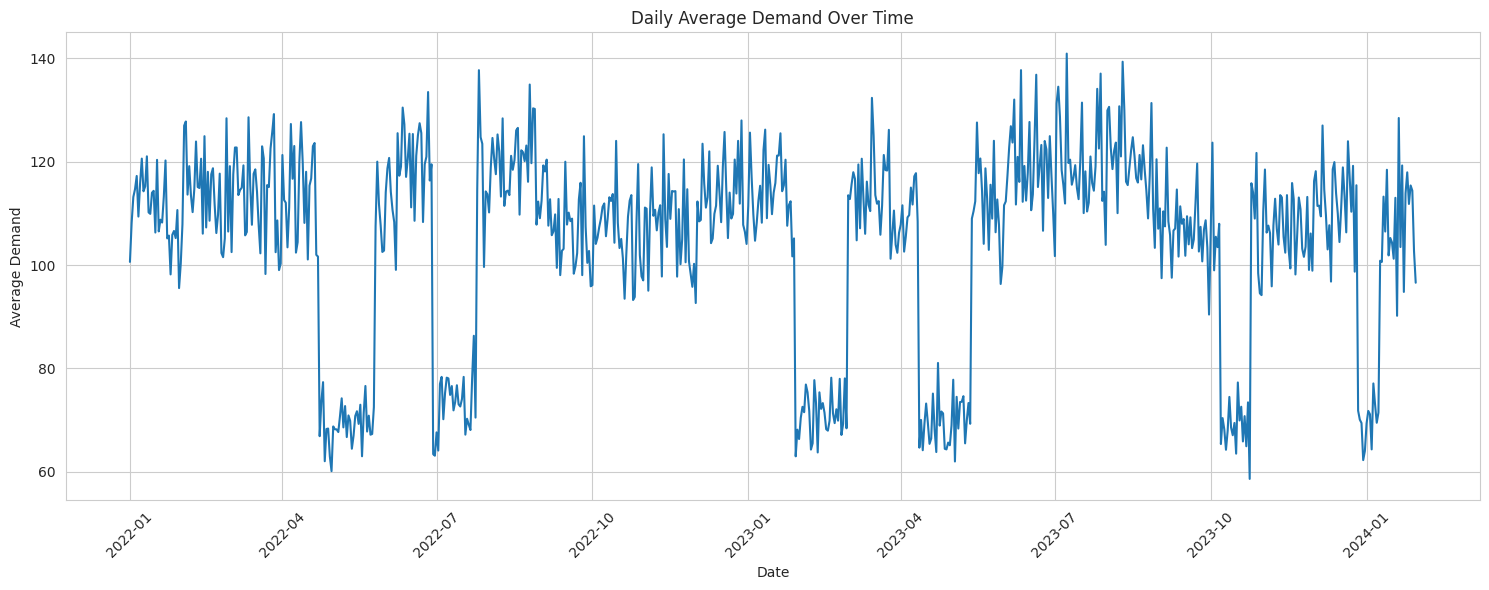

In [203]:
daily_demand = master_df.groupby('Date')['Demand'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_demand, x='Date', y='Demand')
plt.title('Daily Average Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **3.1.2. Target Variable Distribution Analysis**

Summary Statistics for Demand:


,Demand
count,76000.000000
mean,104.317158
std,46.964801
min,4.000000
25%,71.000000
50%,100.000000
75%,133.000000
max,430.000000


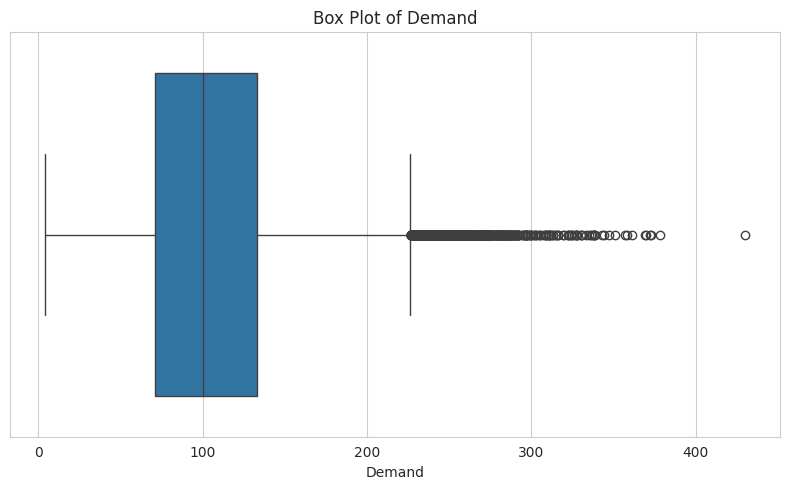

In [204]:
# Summary statistics for the target variable
print("Summary Statistics for Demand:")
display(master_df['Demand'].describe())

# Box plot for the target variable to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=master_df['Demand'])
plt.title('Box Plot of Demand')
plt.xlabel('Demand')
plt.tight_layout()
plt.show()

#### **3.1.3. Relationship between Key Features and Demand**

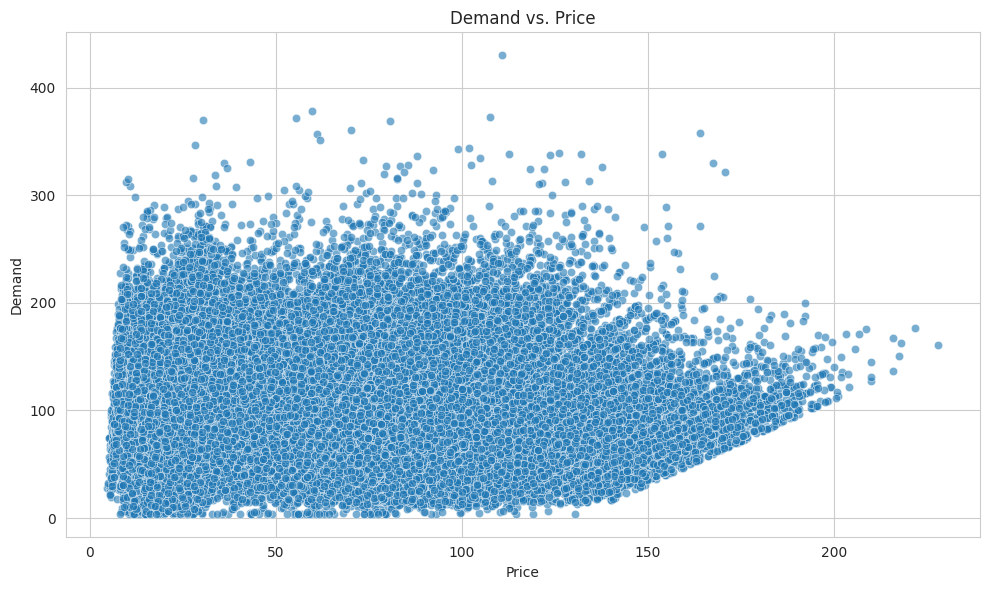

In [205]:
# Scatter plot: Price vs. Demand
plt.figure(figsize=(10, 6))
sns.scatterplot(data=master_df, x='Price', y='Demand', alpha=0.6)
plt.title('Demand vs. Price')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()

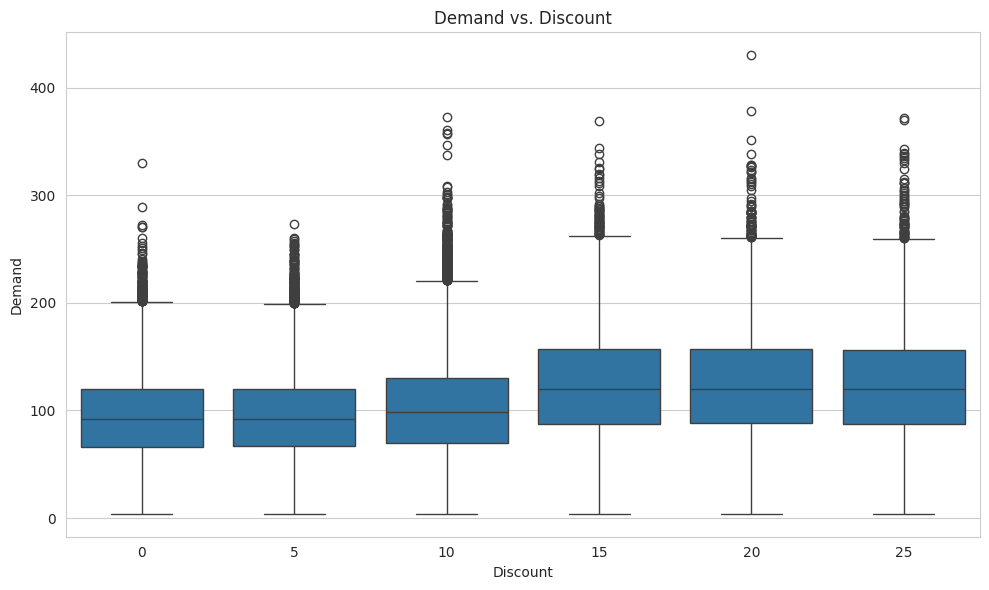

In [206]:
# Box plot: Discount vs. Demand
plt.figure(figsize=(10, 6))
sns.boxplot(data=master_df, x='Discount', y='Demand')
plt.title('Demand vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()

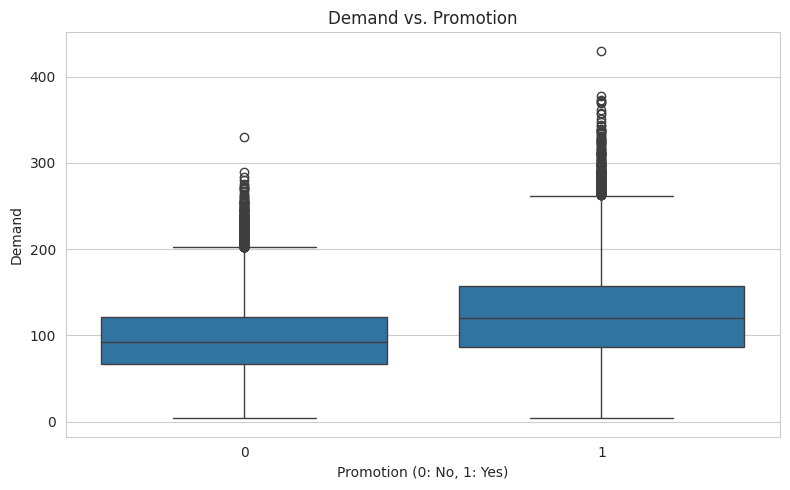

In [207]:
# Box plot: Promotion vs. Demand (assuming Promotion is binary or has few categories)
plt.figure(figsize=(8, 5))
sns.boxplot(data=master_df, x='Promotion', y='Demand')
plt.title('Demand vs. Promotion')
plt.xlabel('Promotion (0: No, 1: Yes)')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()

In [208]:
# # Box plot: Day of Week vs. Demand
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=master_df, x='dayofweek', y='Demand')
# plt.title('Demand vs. Day of Week')
# plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
# plt.ylabel('Demand')
# plt.tight_layout()
# plt.show()

#### **3.1.4. Time Series Analysis by Category (Example)**

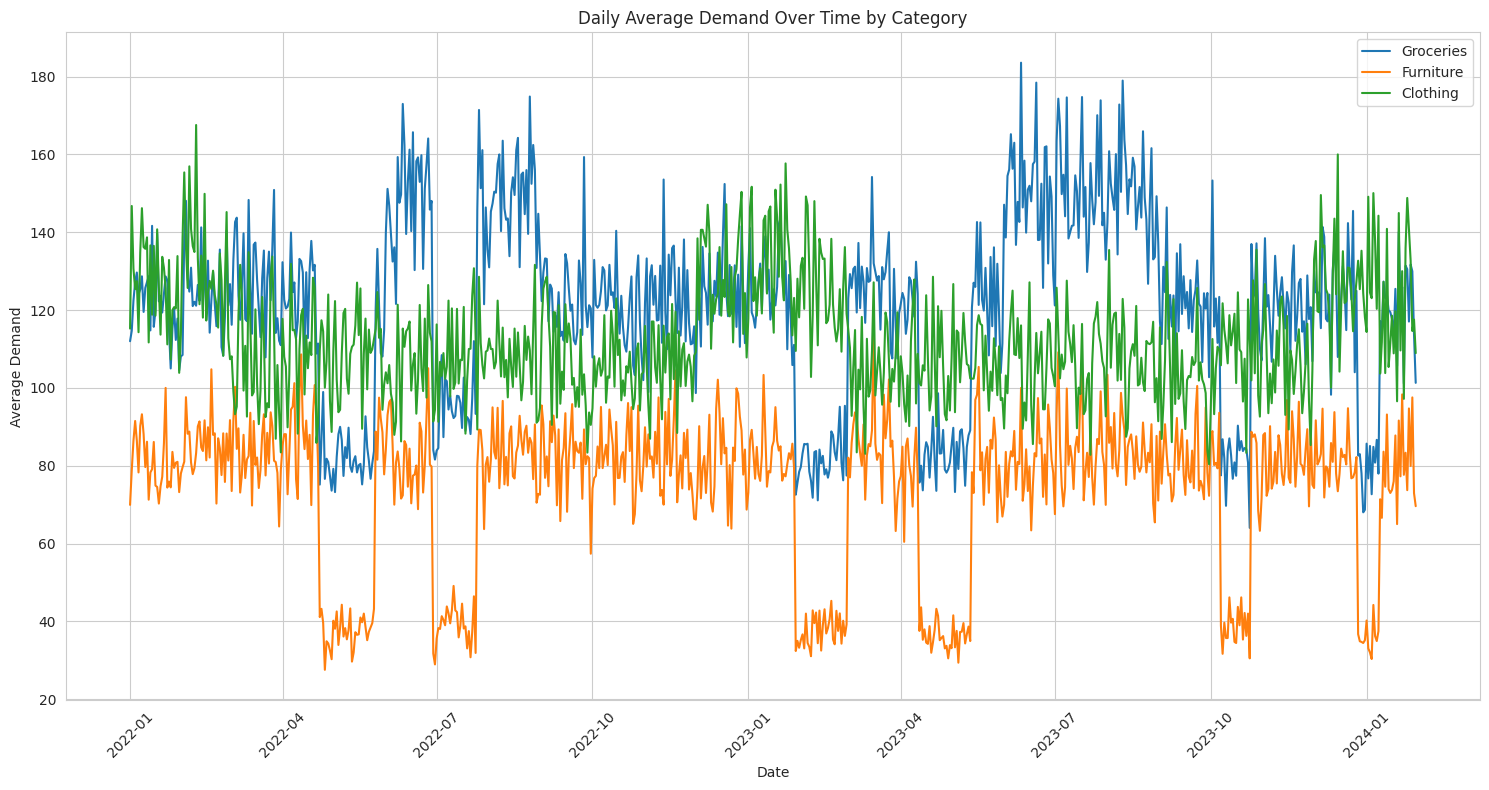

In [209]:
# Example: Plot daily average Demand for a few categories
# Select top categories or a few interesting ones
top_categories = master_df['Category'].value_counts().nlargest(3).index.tolist()

plt.figure(figsize=(15, 8))
for category in top_categories:
    category_df = master_df[master_df['Category'] == category].groupby('Date')['Demand'].mean().reset_index()
    sns.lineplot(data=category_df, x='Date', y='Demand', label=category)

plt.title('Daily Average Demand Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Average Demand')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **3.1.5. Distribution Analysis Using Histograms for numerical features**

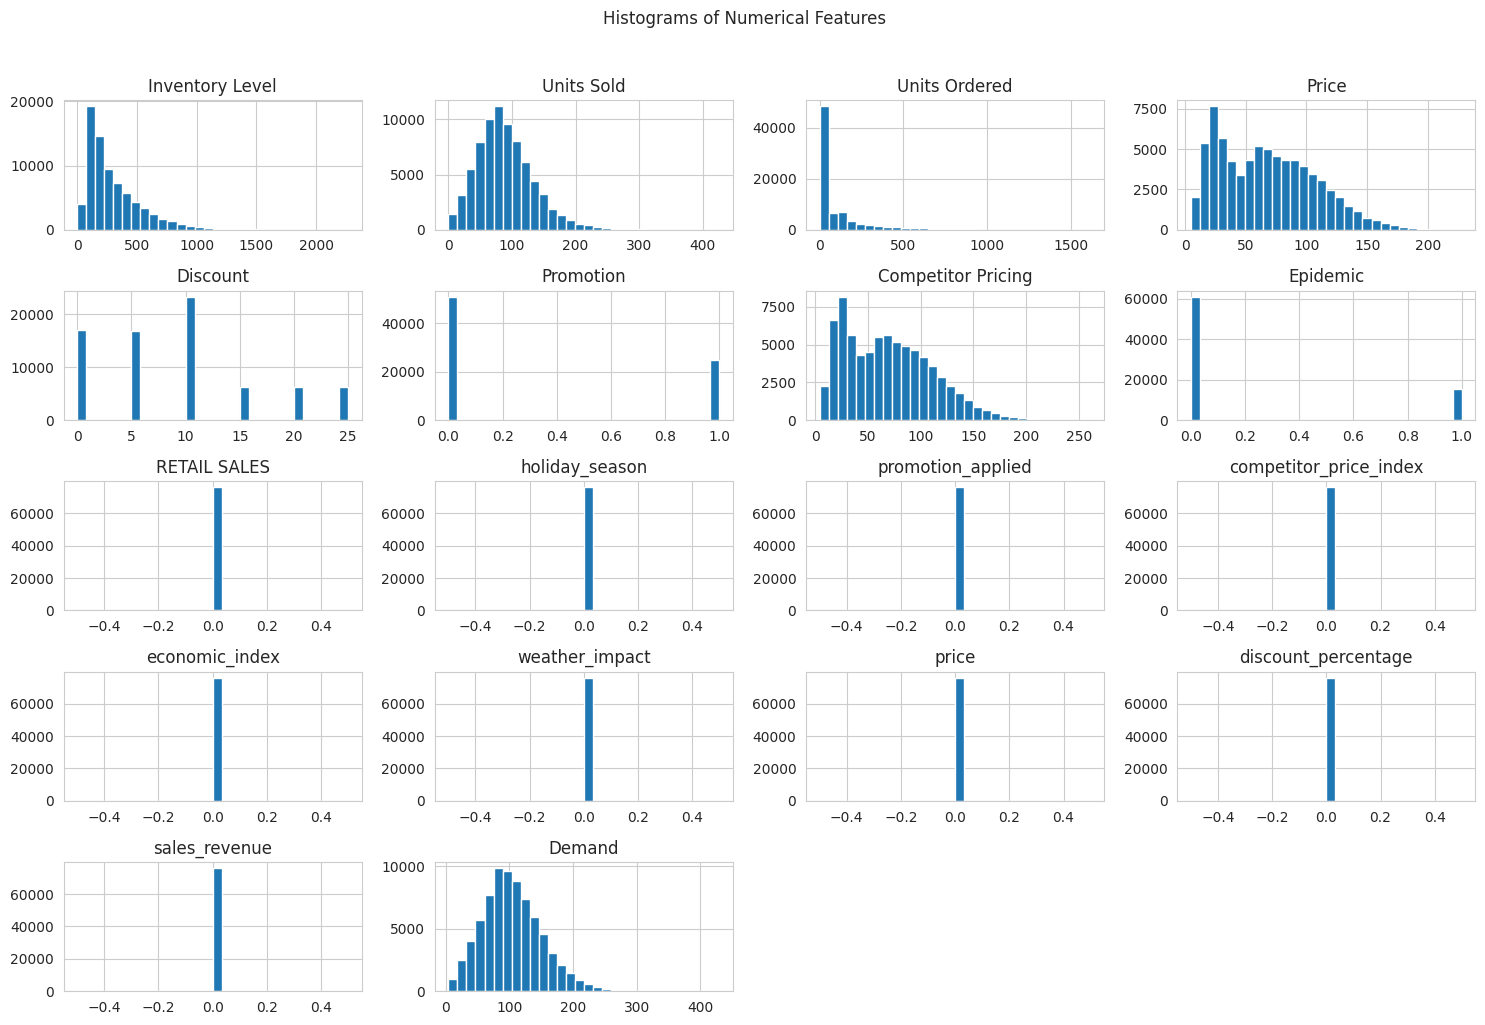

In [210]:
# Define numerical features more explicitly
numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
                      'Promotion', 'Competitor Pricing', 'Epidemic', 'RETAIL SALES',
                      'holiday_season', 'promotion_applied', 'competitor_price_index',
                      'economic_index', 'weather_impact', 'price', 'discount_percentage',
                      'sales_revenue', 'Demand'] # Included 'Demand' for distribution

master_df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

#### **3.1.6. Count Plots for Categorical Features**

/tmp/ipython-input-1099832817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


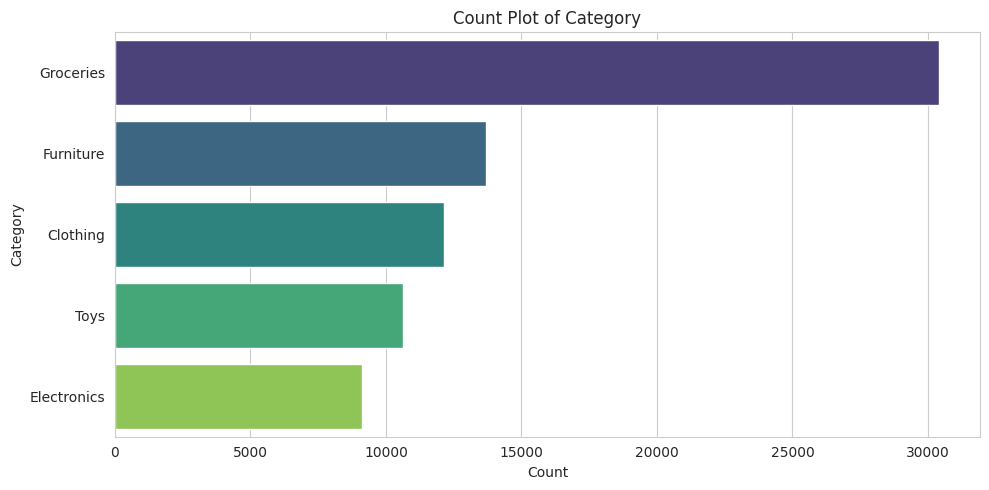

/tmp/ipython-input-1099832817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


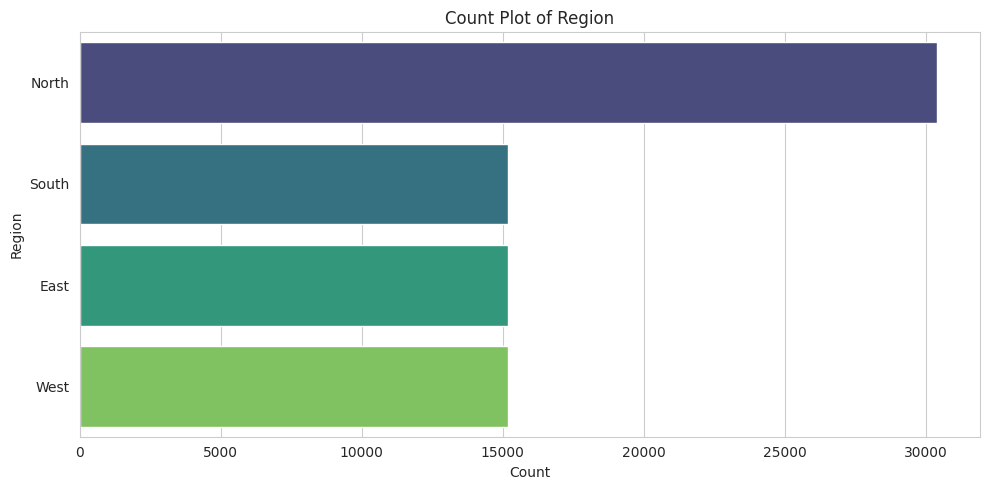

/tmp/ipython-input-1099832817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


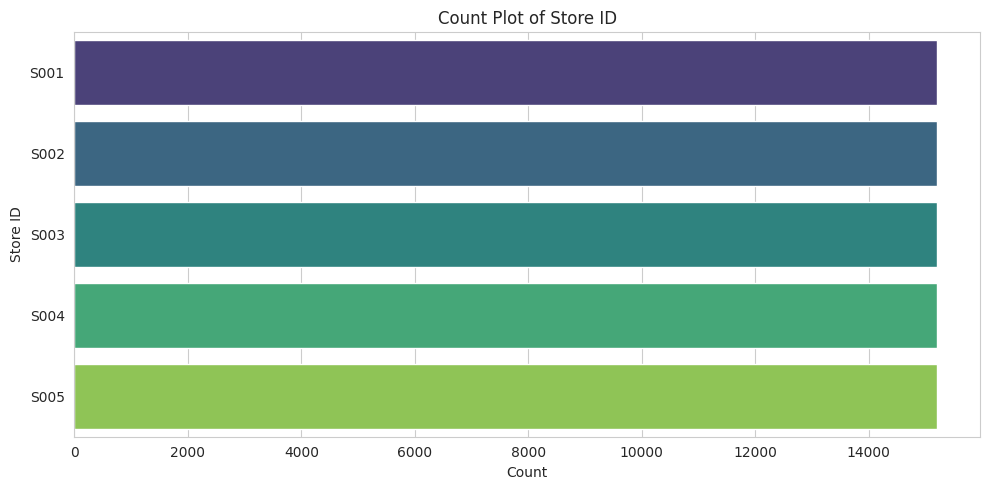

/tmp/ipython-input-1099832817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


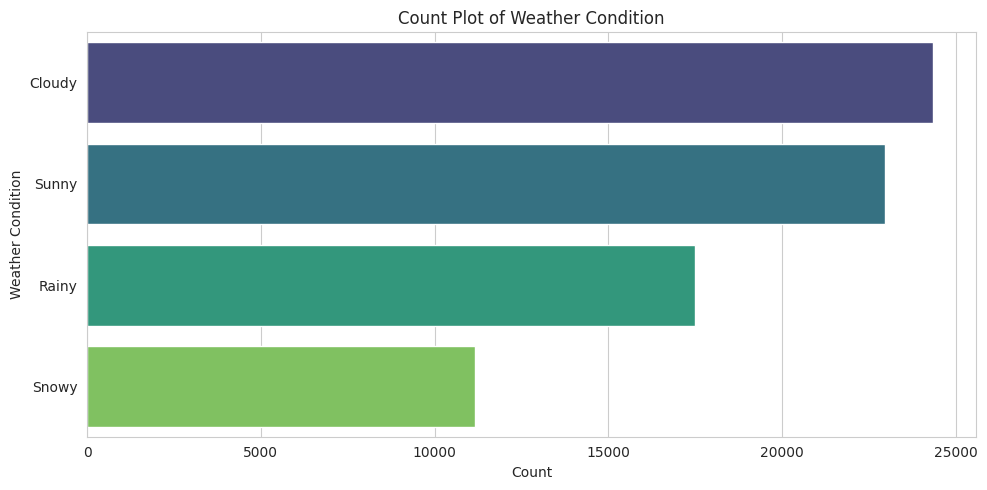

/tmp/ipython-input-1099832817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


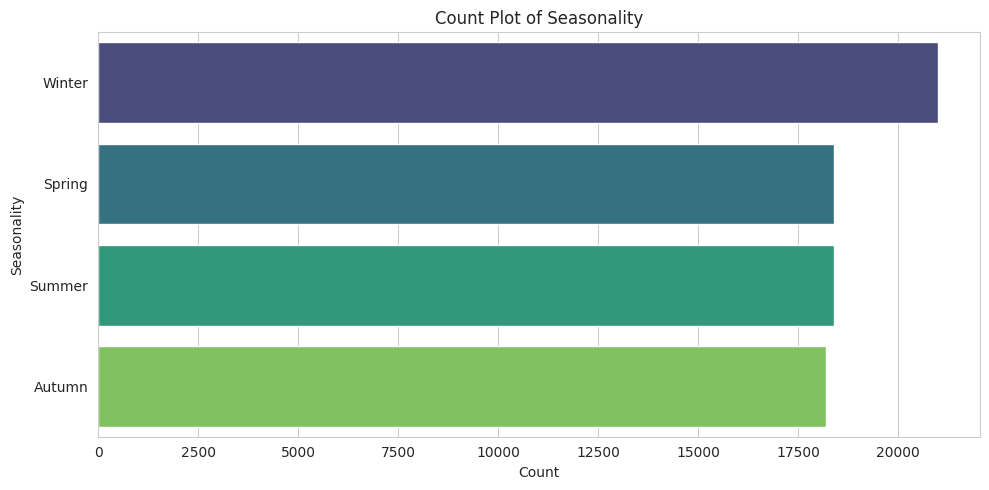

/tmp/ipython-input-1099832817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


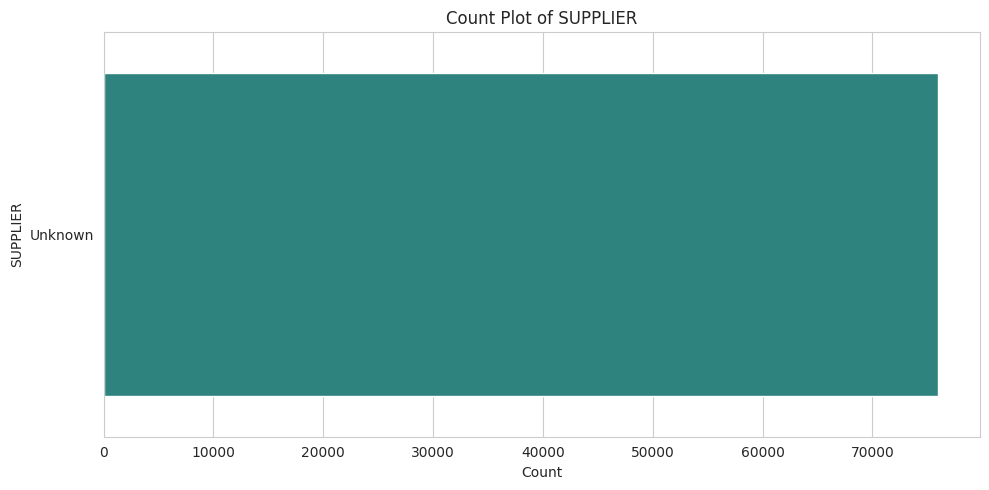

/tmp/ipython-input-1099832817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')


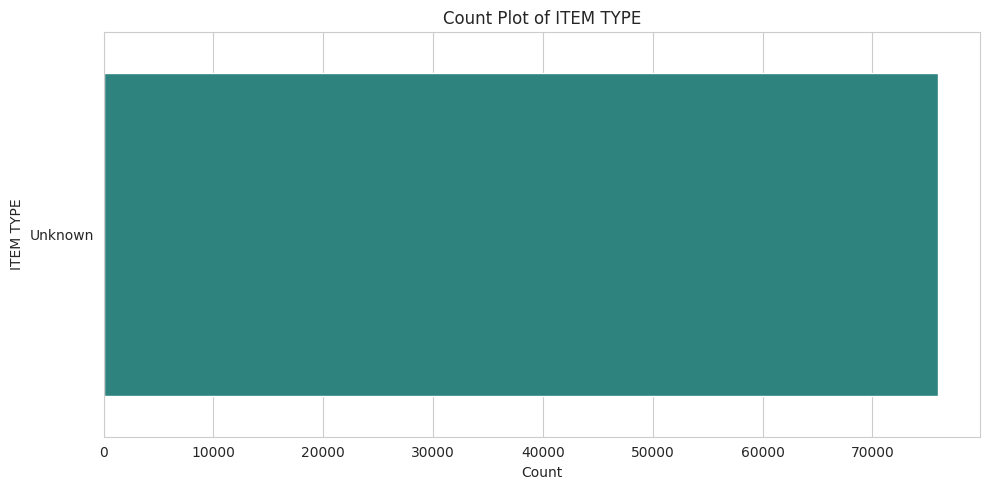

In [211]:
# Count plots for categorical features
# Define categorical features more explicitly
categorical_features = ['Category', 'Region', 'Store ID', 'Weather Condition', 'Seasonality', 'SUPPLIER', 'ITEM TYPE'] # Added SUPPLIER and ITEM TYPE

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    # Use `dropna=False` to include potential NaN category from merge if any (though we expect them to be filled now)
    sns.countplot(data=master_df, y=col, order=master_df[col].value_counts(dropna=False).index, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

#### **3.1.7. Correlation Analysis for Numerical Features**

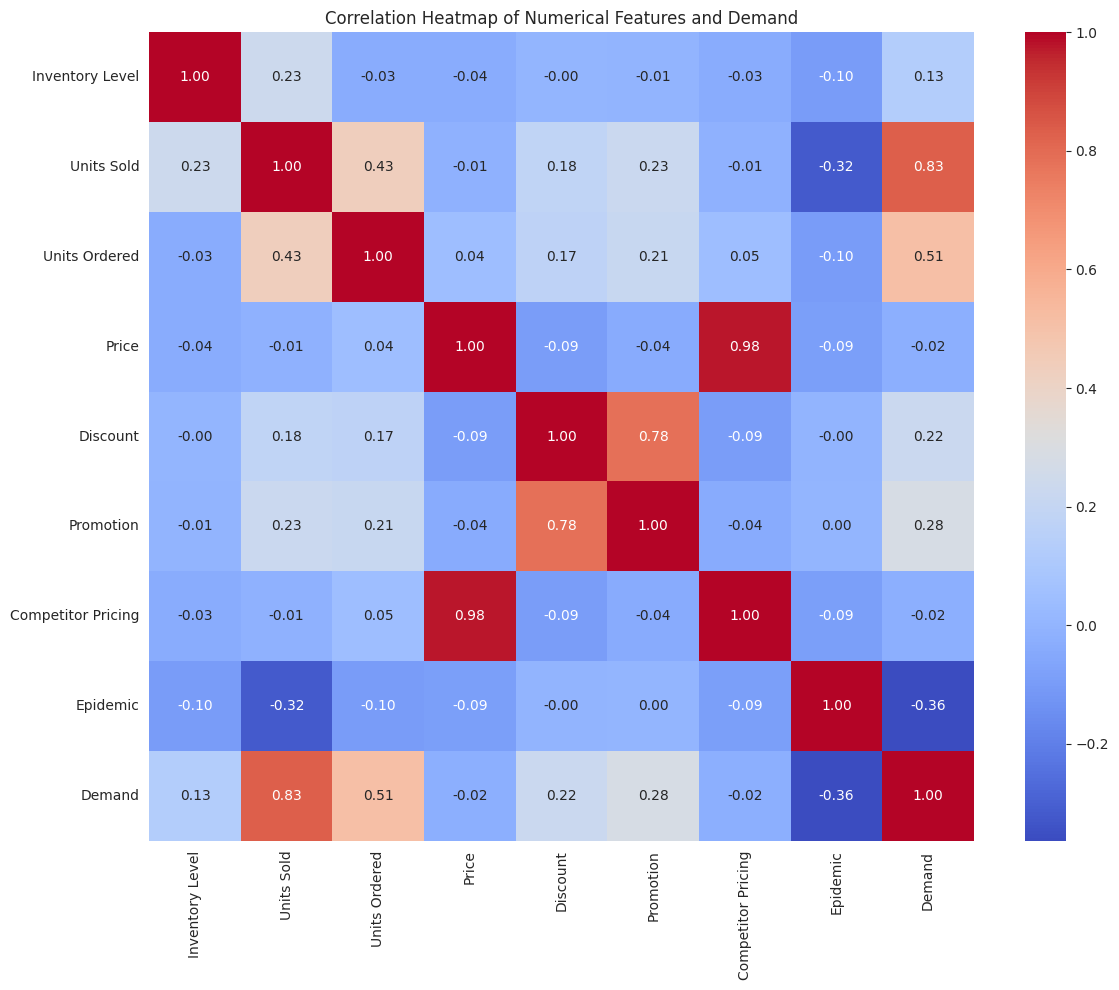

In [212]:
plt.figure(figsize=(12, 10))
# Ensure only numerical columns are included for correlation calculation
numerical_for_corr = master_df.select_dtypes(include=np.number).columns.tolist()

# Exclude columns that are all zeros or have very low variance (can cause issues with correlation calculation)
# Also exclude the target variable 'Demand' from the features for correlation with features
cols_to_exclude = ['Demand']
numerical_for_corr = [col for col in numerical_for_corr if col not in cols_to_exclude and master_df[col].nunique() > 1]

correlation_matrix = master_df[numerical_for_corr + [target_variable]].corr() # Include target for correlation with features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Demand')
plt.tight_layout()
plt.show()

**Detail Kode dan Analisis:**

1.  **Analisis Time Series: Plot Rata-rata Permintaan Harian (`daily_demand` plot):**
    *   Kode ini pertama-tama menghitung rata-rata permintaan harian dengan mengelompokkan `master_df` berdasarkan `Date` dan menghitung rata-rata kolom `Demand`. Hasilnya disimpan dalam DataFrame `daily_demand`.
    *   Kemudian, plot garis (lineplot) dibuat menggunakan `seaborn` untuk memvisualisasikan rata-rata permintaan harian dari waktu ke waktu.
    *   **Wawasan:** Plot ini membantu mengidentifikasi tren permintaan secara keseluruhan, pola musiman (jika ada siklus yang jelas dalam periode waktu data), atau anomali permintaan yang signifikan pada tanggal-tanggal tertentu.

2.  **Analisis Distribusi Variabel Target (`Demand`):**
    *   **Ringkasan Statistik:** `master_df['Demand'].describe()` digunakan untuk menampilkan statistik deskriptif variabel target, termasuk rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil. Ini memberikan gambaran kuantitatif tentang pusat, sebaran, dan rentang nilai permintaan.
    *   **Box Plot:** Box plot dari kolom `Demand` divisualisasikan.
    *   **Wawasan:** Box plot efektif untuk memvisualisasikan distribusi permintaan dan mendeteksi keberadaan *outlier* (nilai ekstrem) yang perlu ditangani di langkah selanjutnya.

3.  **Hubungan Antara Fitur Kunci dan Variabel Target (`Demand`):**
    *   **Scatter Plot (Price vs. Demand):** Plot sebar dibuat untuk menunjukkan hubungan antara `Price` dan `Demand`.
        *   **Wawasan:** Scatter plot ini membantu melihat apakah ada korelasi antara harga produk dan jumlah permintaan. Biasanya, diharapkan ada hubungan negatif (harga naik, permintaan turun), tetapi ini bisa bervariasi tergantung produk dan konteksnya.
    *   **Box Plot (Discount vs. Demand):** Box plot dibuat untuk membandingkan distribusi `Demand` untuk setiap nilai `Discount`.
        *   **Wawasan:** Ini menunjukkan bagaimana tingkat diskon yang berbeda memengaruhi rata-rata atau sebaran permintaan. Diharapkan ada peningkatan permintaan pada tingkat diskon yang lebih tinggi.
    *   **Box Plot (Promotion vs. Demand):** Box plot dibuat untuk membandingkan distribusi `Demand` antara produk yang memiliki promosi (`Promotion=1`) dan yang tidak (`Promotion=0`).
        *   **Wawasan:** Visualisasi ini secara jelas menunjukkan dampak keberadaan promosi terhadap permintaan. Diharapkan permintaan lebih tinggi saat ada promosi.
    *   **Box Plot (Day of Week vs. Demand):** Box plot dibuat untuk membandingkan distribusi `Demand` untuk setiap hari dalam seminggu.
        *   **Wawasan:** Ini membantu mengidentifikasi pola permintaan harian dalam seminggu (misalnya, apakah permintaan lebih tinggi di akhir pekan).

4.  **Analisis Time Series Berdasarkan Kategori (Contoh):**
    *   Kode ini memilih 3 kategori produk teratas berdasarkan jumlah kemunculannya.
    *   Kemudian, untuk setiap kategori teratas, dihitung rata-rata permintaan harian dari waktu ke waktu.
    *   Plot garis (lineplot) dibuat untuk memvisualisasikan rata-rata permintaan harian dari waktu ke waktu *untuk setiap kategori* dalam satu plot.
    *   **Wawasan:** Plot ini memungkinkan perbandingan tren permintaan antar kategori yang berbeda, menunjukkan apakah ada pola musiman atau tren yang unik untuk kategori tertentu.

5.  **Analisis Distribusi Menggunakan Histogram untuk Fitur Numerik:**
    *   Kode ini memilih daftar fitur numerik yang relevan.
    *   Histogram dibuat untuk setiap fitur numerik dalam daftar menggunakan `.hist()`.
    *   **Wawasan:** Histogram menunjukkan bentuk distribusi setiap fitur numerik (normal, miring, seragam, dll.) dan membantu mengidentifikasi rentang nilai umum serta keberadaan nilai ekstrem atau outlier.

6.  **Count Plots untuk Fitur Kategorikal:**
    *   Kode ini memilih daftar fitur kategorikal yang relevan (termasuk yang berasal dari hasil penggabungan seperti 'SUPPLIER', 'ITEM TYPE').
    *   Plot hitungan (countplot) dibuat untuk setiap fitur kategorikal, menampilkan jumlah kemunculan setiap kategori. `.value_counts(dropna=False).index` digunakan untuk memastikan urutan plot berdasarkan frekuensi dan menyertakan kategori 'Unknown' jika ada.
    *   **Wawasan:** Count plot menunjukkan distribusi frekuensi setiap kategori dalam fitur kategorikal. Ini membantu memahami proporsi data untuk setiap kategori dan mengidentifikasi kategori yang dominan atau yang jarang muncul.

7.  **Analisis Korelasi untuk Fitur Numerik (Heatmap):**
    *   Kode ini memilih kolom numerik yang relevan (tidak termasuk target dan kolom dengan nilai konstan) dan menghitung matriks korelasi menggunakan `.corr()`.
    *   Heatmap dibuat dari matriks korelasi menggunakan `seaborn.heatmap()`.
    *   **Wawasan:** Heatmap korelasi memvisualisasikan kekuatan dan arah hubungan linier antara pasangan fitur numerik. Ini membantu mengidentifikasi fitur-fitur yang sangat berkorelasi satu sama lain (potensi multikolinieritas) atau fitur-fitur yang berkorelasi kuat dengan variabel target (`Demand`).

Secara keseluruhan, tahap EDA ini memberikan gambaran visual dan statistik yang komprehensif tentang data, menyoroti pola-pola penting, hubungan antar variabel, dan potensi masalah data (seperti outlier) yang perlu ditangani di langkah-langkah persiapan data selanjutnya. Wawasan yang diperoleh dari EDA ini akan memandu proses rekayasa fitur dan pemilihan model.

### **Step 4: Outlier Detection and Treatment (Deteksi dan Perlakuan Outlier)**

Langkah keempat dalam pipeline persiapan data ini berfokus pada identifikasi dan penanganan nilai-nilai ekstrem atau "outlier" dalam fitur-fitur numerik. Outlier dapat secara signifikan memengaruhi kinerja model machine learning, terutama model yang sensitif terhadap skala dan distribusi data seperti regresi linier atau model berbasis jarak.

**Tujuan Langkah Ini:**

*   Memvisualisasikan distribusi fitur numerik untuk mengidentifikasi keberadaan outlier.
*   Menerapkan strategi perlakuan outlier pada fitur-fitur yang relevan.
*   Memahami alasan mengapa outlier perlu ditangani pada fitur, namun tidak pada variabel target dalam kasus regresi.


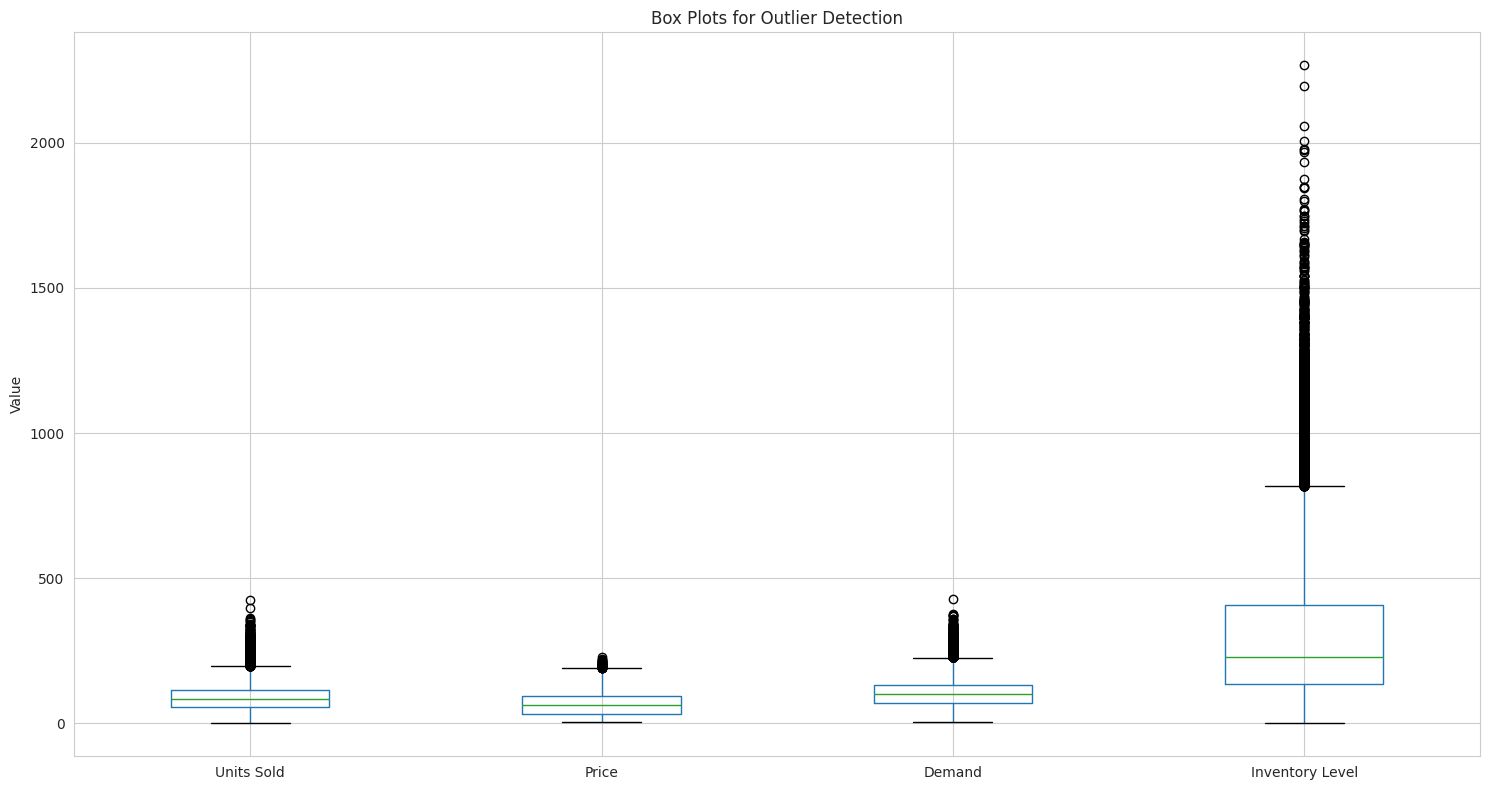

In [213]:
# Visualize Outliers using Box Plots
# Select numerical features that are likely to contain outliers
outlier_features_to_plot = ['Units Sold', 'Price', 'Demand', 'Inventory Level']

# Check if these columns exist in the DataFrame after previous steps
outlier_features_to_plot = [col for col in outlier_features_to_plot if col in master_df.columns]

if outlier_features_to_plot:
    plt.figure(figsize=(15, 8))
    # Use the DataFrame directly for plotting
    master_df[outlier_features_to_plot].boxplot()
    plt.title('Box Plots for Outlier Detection')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()
else:
    print("No relevant numerical columns found for outlier plotting.")

In [214]:
# Treat Outliers (Optional but Recommended) - Capping using the IQR method
print("\nOutlier Treatment (Capping using IQR method):")
print("The Interquartile Range (IQR) method is used to identify potential outliers.")
print("Values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers based on this method.")
print("Capping involves replacing these identified outliers with the calculated lower or upper boundary values.")


Outlier Treatment (Capping using IQR method):
The Interquartile Range (IQR) method is used to identify potential outliers.
Values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers based on this method.
Capping involves replacing these identified outliers with the calculated lower or upper boundary values.


In [215]:
# Define numerical features for outlier capping
# Exclude boolean columns and identifier columns like 'Product ID' and time-based integer columns
numerical_features_for_capping = ['Units Sold', 'Price', 'Inventory Level',
                                  'Units Ordered', 'Competitor Pricing',
                                  'RETAIL SALES', 'price', 'discount_percentage',
                                  'sales_revenue'] # Add other relevant numerical columns

# Ensure these columns exist in the DataFrame
numerical_features_for_capping = [col for col in numerical_features_for_capping if col in master_df.columns]

# Apply capping to the selected numerical features
for col in numerical_features_for_capping:
    if col in master_df.columns:
        Q1 = master_df[col].quantile(0.25)
        Q3 = master_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping using .clip()
        # Create new columns for capped values to preserve original data
        master_df[f'{col}_capped'] = master_df[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"Applied IQR capping to '{col}'. New column created: '{col}_capped'")
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping capping for this column.")

Applied IQR capping to 'Units Sold'. New column created: 'Units Sold_capped'
Applied IQR capping to 'Price'. New column created: 'Price_capped'
Applied IQR capping to 'Inventory Level'. New column created: 'Inventory Level_capped'
Applied IQR capping to 'Units Ordered'. New column created: 'Units Ordered_capped'
Applied IQR capping to 'Competitor Pricing'. New column created: 'Competitor Pricing_capped'
Applied IQR capping to 'RETAIL SALES'. New column created: 'RETAIL SALES_capped'
Applied IQR capping to 'price'. New column created: 'price_capped'
Applied IQR capping to 'discount_percentage'. New column created: 'discount_percentage_capped'
Applied IQR capping to 'sales_revenue'. New column created: 'sales_revenue_capped'


In [216]:
# Display head with some original and capped columns
print("\nDataFrame head with some original and capped columns:")
# Select a few columns to display, including original and capped versions if they exist
display_cols = ['Units Sold', 'Units Sold_capped', 'Price', 'Price_capped',
                'Inventory Level', 'Inventory Level_capped', 'Demand'] # Add other relevant columns

# Filter display_cols to only include columns actually in master_df
display_cols_existing = [col for col in display_cols if col in master_df.columns]

display(master_df[display_cols_existing].head())


DataFrame head with some original and capped columns:


,Units Sold,Units Sold_capped,Price,Price_capped,Inventory Level,Inventory Level_capped,Demand
0,102,102,72.72,72.72,195,195,115
1,117,117,80.16,80.16,117,117,229
2,114,114,62.94,62.94,247,247,157
3,45,45,87.63,87.63,139,139,52
4,65,65,54.41,54.41,152,152,59


**Detail Kode dan Analisis:**

1.  **Visualisasi Outlier menggunakan Box Plot:**
    *   Kode ini memilih subset kolom numerik yang relevan (`Units Sold`, `Price`, `Demand`, `Inventory Level`, serta kolom numerik lainnya yang bervariasi) untuk visualisasi. Kolom-kolom waktu (`year`, `month`, dll.) dan boolean dikecualikan karena sifatnya yang berbeda.
    *   Box plot dibuat untuk setiap kolom yang dipilih menggunakan `master_df[outlier_features_to_plot].boxplot()`.
    *   **Wawasan:** Box plot secara efektif menunjukkan distribusi data dan menyoroti titik-titik data individual yang berada di luar batas "kumis" (whiskers), yang dianggap sebagai calon outlier berdasarkan metode IQR (Interquartile Range). Visualisasi ini memberikan gambaran cepat tentang fitur mana yang memiliki outlier dan seberapa ekstrem outlier tersebut.

2.  **Perlakuan Outlier (Capping menggunakan Metode IQR):**
    *   Kode ini mendefinisikan daftar fitur numerik yang akan diterapkan perlakuan outlier. Variabel target (`Demand`) sengaja **tidak** dimasukkan ke dalam daftar ini.
    *   Metode yang dipilih adalah **Capping** menggunakan Interquartile Range (IQR).
        *   Untuk setiap kolom yang dipilih:
            *   Kuartil pertama (Q1) dan kuartil ketiga (Q3) dihitung.
            *   IQR dihitung sebagai selisih antara Q3 dan Q1 (`IQR = Q3 - Q1`).
            *   Batas bawah (`lower_bound`) dan batas atas (`upper_bound`) dihitung menggunakan rumus umum untuk outlier: `lower_bound = Q1 - 1.5 * IQR` dan `upper_bound = Q3 + 1.5 * IQR`.
            *   Fungsi `.clip(lower=lower_bound, upper=upper_bound)` diterapkan pada kolom. Ini mengganti nilai-nilai yang lebih kecil dari `lower_bound` dengan `lower_bound` itu sendiri, dan nilai-nilai yang lebih besar dari `upper_bound` dengan `upper_bound` itu sendiri.
        *   Kolom baru dengan akhiran `_capped` dibuat untuk menyimpan nilai yang sudah dikenai capping, menjaga kolom asli tetap utuh. Ini praktik yang baik untuk perbandingan dan fleksibilitas.
    *   Pesan konfirmasi dicetak untuk setiap kolom yang berhasil diterapkan capping.
    *   Beberapa baris awal DataFrame ditampilkan, menyertakan kolom asli dan kolom yang sudah di-capping, untuk memverifikasi hasilnya.

**Mengapa Menangani Outlier pada Fitur tetapi Tidak pada Variabel Target?**

*   **Outlier pada Fitur:** Nilai ekstrem pada fitur (variabel independen) dapat mendistorsi hubungan antara fitur tersebut dan variabel target selama pelatihan model. Misalnya, satu atau dua nilai harga yang sangat tinggi yang mungkin merupakan kesalahan entri data bisa membuat model belajar bahwa harga yang sangat tinggi berkorelasi dengan permintaan tertentu, meskipun itu bukan pola yang sebenarnya. Menangani outlier pada fitur membantu model belajar pola yang lebih umum dan robust dari sebagian besar data.
*   **Outlier pada Variabel Target (`Demand`):** Seperti dijelaskan sebelumnya, dalam masalah regresi, variabel target adalah apa yang ingin kita prediksi. Nilai ekstrem pada target (misalnya, lonjakan permintaan yang sangat tinggi) mungkin merupakan data yang valid dan informatif (misalnya, efek promosi besar). Mengubah nilai target berarti model dilatih untuk memprediksi sesuatu yang berbeda dari realitas. Tujuan kita adalah model yang dapat memprediksi nilai permintaan yang bervariasi, termasuk nilai yang mungkin diidentifikasi sebagai outlier dalam analisis deskriptif.

Dengan menerapkan capping pada fitur numerik yang relevan, kita mengurangi dampak negatif outlier pada proses pembelajaran model tanpa menghilangkan informasi atau mengubah variabel target yang ingin kita prediksi. Langkah ini meningkatkan kualitas data masukan untuk model dan berkontribusi pada performa prediksi yang lebih stabil dan akurat.

### **Step 5: Feature Engineering I - Time-Based Features (Rekayasa Fitur I - Fitur Berbasis Waktu)**

Langkah kelima dalam pipeline persiapan data ini adalah rekayasa fitur yang berfokus pada ekstraksi informasi berguna dari kolom tanggal (`Date`). Fitur berbasis waktu sangat penting dalam peramalan deret waktu karena dapat menangkap pola musiman (harian, mingguan, bulanan, tahunan) dan tren yang memengaruhi permintaan.

**Tujuan Langkah Ini:**

*   Mengekstrak komponen-komponen waktu dari kolom `Date`.
*   Membuat fitur-fitur numerik baru yang merepresentasikan posisi setiap observasi dalam siklus waktu (tahun, bulan, hari, hari dalam seminggu, dll.).


In [217]:
# Create time-based features
master_df['year'] = master_df['Date'].dt.year
master_df['month'] = master_df['Date'].dt.month
master_df['day'] = master_df['Date'].dt.day
master_df['dayofweek'] = master_df['Date'].dt.dayofweek # Monday=0, Sunday=6
master_df['dayofyear'] = master_df['Date'].dt.dayofyear
master_df['weekofyear'] = master_df['Date'].dt.isocalendar().week.astype(int)
master_df['quarter'] = master_df['Date'].dt.quarter

print("Time-based features created.")
display(master_df[['Date', 'year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']].head())

Time-based features created.


,Date,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,2022-01-01,2022,1,1,5,1,52,1
1,2022-01-01,2022,1,1,5,1,52,1
2,2022-01-01,2022,1,1,5,1,52,1
3,2022-01-01,2022,1,1,5,1,52,1
4,2022-01-01,2022,1,1,5,1,52,1


**Detail Kode dan Analisis:**

Kode di bagian ini menggunakan aksesori `.dt` dari tipe data datetime pandas untuk mengekstrak berbagai komponen waktu dari kolom `Date` yang sebelumnya telah dikonversi ke format datetime. Fitur-fitur baru yang dibuat meliputi:

1.  **`year`:** Mengekstrak tahun dari tanggal. Ini dapat membantu model mengidentifikasi tren tahunan atau perbedaan pola permintaan antar tahun.
    *   `master_df['year'] = master_df['Date'].dt.year`
2.  **`month`:** Mengekstrak bulan dari tanggal (1-12). Ini penting untuk menangkap pola musiman bulanan (misalnya, lonjakan permintaan saat liburan akhir tahun).
    *   `master_df['month'] = master_df['Date'].dt.month`
3.  **`day`:** Mengekstrak hari dalam bulan (1-31). Dapat menangkap pola yang terjadi pada tanggal-tanggal tertentu dalam sebulan (misalnya, awal atau akhir bulan).
    *   `master_df['day'] = master_df['Date'].dt.day`
4.  **`dayofweek`:** Mengekstrak hari dalam seminggu (0=Senin, 6=Minggu). Ini sangat penting untuk menangkap pola permintaan mingguan (misalnya, apakah penjualan lebih tinggi di akhir pekan).
    *   `master_df['dayofweek'] = master_df['Date'].dt.dayofweek`
5.  **`dayofyear`:** Mengekstrak hari dalam setahun (1-365 atau 366 untuk tahun kabisat). Dapat menangkap pola yang berulang pada hari yang sama setiap tahun, terlepas dari hari dalam seminggu.
    *   `master_df['dayofyear'] = master_df['Date'].dt.dayofyear`
6.  **`weekofyear`:** Mengekstrak nomor minggu dalam setahun. Mirip dengan `dayofyear`, ini dapat menangkap pola berdasarkan minggu tertentu dalam setahun. `.isocalendar().week` digunakan untuk penomoran minggu standar ISO. `.astype(int)` memastikan tipe data integer.
    *   `master_df['weekofyear'] = master_df['Date'].dt.isocalendar().week.astype(int)`
7.  **`quarter`:** Mengekstrak kuartal dalam setahun (1-4). Dapat menangkap pola permintaan musiman yang lebih luas antar kuartal.
    *   `master_df['quarter'] = master_df['Date'].dt.quarter`

Setelah fitur-fitur ini dibuat, pesan konfirmasi dicetak dan beberapa baris awal DataFrame ditampilkan, menyertakan kolom `Date` asli dan fitur-fitur waktu yang baru dibuat, untuk memverifikasi hasilnya.

Dengan menambahkan fitur-fitur berbasis waktu ini, model akan memiliki informasi tambahan untuk mengidentifikasi dan memanfaatkan pola-pola temporal dalam data permintaan, yang sangat penting untuk peramalan deret waktu yang akurat.

### **Step 6: Feature Engineering II - Lag Features (Rekayasa Fitur II - Fitur Lag)**

Langkah keenam dalam pipeline persiapan data berfokus pada pembuatan fitur lag. Fitur lag sangat penting dalam peramalan deret waktu karena menangkap nilai-nilai variabel target dari periode waktu sebelumnya. Ini secara efektif memberi model informasi tentang "apa yang terjadi di masa lalu", yang seringkali merupakan prediktor kuat untuk "apa yang akan terjadi di masa depan" dalam data time series.

**Tujuan Langkah Ini:**

*   Menciptakan fitur baru yang merepresentasikan nilai `Demand` dari *n* periode waktu sebelumnya (lag).
*   Memungkinkan model untuk belajar dari ketergantungan temporal data.


In [218]:
# Create lag features for the 'Demand' column
master_df['demand_lag_7'] = master_df.groupby('Product ID')['Demand'].shift(7)
master_df['demand_lag_28'] = master_df.groupby('Product ID')['Demand'].shift(28)

# Handle resulting NaN values (e.g., fill with 0 or the mean of the lag feature)
# Filling with 0 as these are the initial periods where no lag data is available
master_df['demand_lag_7'] = master_df['demand_lag_7'].fillna(0)
master_df['demand_lag_28'] = master_df['demand_lag_28'].fillna(0)


print("Lag features created for 'Demand'.")
display(master_df[['Date', 'Product ID', 'Demand', 'demand_lag_7', 'demand_lag_28']].head(10))

Lag features created for 'Demand'.


,Date,Product ID,Demand,demand_lag_7,demand_lag_28
0,2022-01-01,P0001,115,0.0,0.0
1,2022-01-01,P0002,229,0.0,0.0
2,2022-01-01,P0003,157,0.0,0.0
3,2022-01-01,P0004,52,0.0,0.0
4,2022-01-01,P0005,59,0.0,0.0
5,2022-01-01,P0006,55,0.0,0.0
6,2022-01-01,P0007,94,0.0,0.0
7,2022-01-01,P0008,61,0.0,0.0
8,2022-01-01,P0009,129,0.0,0.0
9,2022-01-01,P0010,69,0.0,0.0


**Detail Kode dan Analisis:**

Kode di bagian ini menggunakan fungsi `.shift()` pandas, yang sangat berguna untuk membuat fitur lag. Fungsi ini menggeser data dalam Series atau DataFrame berdasarkan jumlah periode yang ditentukan. Penggunaan `.groupby('Product ID')` sebelum `.shift()` memastikan bahwa operasi lag dilakukan secara terpisah untuk setiap produk. Ini penting karena kita ingin melihat lag permintaan *untuk produk yang sama*.

1.  **`master_df.groupby('Product ID')['Demand'].shift(7)`:**
    *   Mengelompokkan DataFrame (`master_df`) berdasarkan kolom `Product ID`. Operasi selanjutnya akan diterapkan secara independen pada setiap kelompok produk.
    *   Memilih kolom target `Demand` dalam setiap kelompok.
    *   Menerapkan `.shift(7)`. Ini menggeser nilai `Demand` ke bawah sebanyak 7 baris dalam setiap kelompok produk. Jadi, untuk baris pada tanggal T, nilai di kolom baru ini akan menjadi nilai `Demand` pada tanggal T-7 (7 hari sebelumnya). Hasilnya adalah fitur lag 7 hari, disimpan di kolom `demand_lag_7`.

2.  **`master_df.groupby('Product ID')['Demand'].shift(28)`:**
    *   Melakukan proses serupa untuk membuat fitur lag 28 hari (`demand_lag_28`), merepresentasikan nilai `Demand` 28 hari sebelumnya untuk setiap produk.

3.  **Penanganan Nilai `NaN` yang Dihasilkan:**
    *   Operasi `.shift()` akan menghasilkan nilai `NaN` untuk periode awal di setiap kelompok produk (misalnya, 7 baris pertama untuk `demand_lag_7`, 28 baris pertama untuk `demand_lag_28`), karena tidak ada data "masa lalu" yang cukup untuk menggeser.
    *   Kode menangani `NaN` ini dengan mengisi dengan nilai 0 menggunakan `.fillna(0)`. Ini adalah pendekatan yang umum untuk fitur lag awal di mana data historis tidak tersedia, mengasumsikan bahwa 'ketiadaan data lag' setara dengan nilai lag nol.

Setelah fitur lag dibuat dan nilai `NaN` diisi, pesan konfirmasi dicetak dan beberapa baris awal DataFrame ditampilkan, menyertakan kolom `Date`, `Product ID`, `Demand` asli, serta fitur lag yang baru dibuat, untuk memverifikasi hasilnya.

Dengan menambahkan fitur lag ini, model regresi akan memiliki informasi tentang tren dan pola permintaan terkini dari masa lalu, yang merupakan prediktor kunci dalam banyak skenario peramalan deret waktu.

### **Step 7: Feature Engineering III - Rolling Window Features (Rekayasa Fitur III - Fitur Jendela Bergulir)**

In [219]:
# Create rolling mean features for 'Demand'
master_df['demand_rolling_mean_7'] = master_df.groupby('Product ID')['Demand'].transform(lambda x: x.rolling(window=7).mean())
master_df['demand_rolling_mean_28'] = master_df.groupby('Product ID')['Demand'].transform(lambda x: x.rolling(window=28).mean())

# Handle resulting NaN values (initial periods) by filling with 0
# Filling with 0 as these are the initial periods where no rolling data is available
master_df['demand_rolling_mean_7'] = master_df['demand_rolling_mean_7'].fillna(0)
master_df['demand_rolling_mean_28'] = master_df['demand_rolling_mean_28'].fillna(0)


print("Rolling window features created for 'Demand'.")
display(master_df[['Date', 'Product ID', 'Demand', 'demand_rolling_mean_7', 'demand_rolling_mean_28']].head(30)) # Display more rows to see non-NaN values

Rolling window features created for 'Demand'.


,Date,Product ID,Demand,demand_rolling_mean_7,demand_rolling_mean_28
0,2022-01-01,P0001,115,0.0,0.0
1,2022-01-01,P0002,229,0.0,0.0
2,2022-01-01,P0003,157,0.0,0.0
3,2022-01-01,P0004,52,0.0,0.0
4,2022-01-01,P0005,59,0.0,0.0
5,2022-01-01,P0006,55,0.0,0.0
6,2022-01-01,P0007,94,0.0,0.0
7,2022-01-01,P0008,61,0.0,0.0
8,2022-01-01,P0009,129,0.0,0.0
9,2022-01-01,P0010,69,0.0,0.0


Fitur jendela bergulir, seperti rata-rata bergulir, membantu menghaluskan *noise* dan menangkap tren jangka pendek dalam data.

### **Step 8: Categorical Feature Encoding**

Convert categorical features into a numerical format using One-Hot Encoding.

In [178]:
# Identify categorical columns (excluding 'Date' and 'Product ID' which are not features for encoding here)
categorical_features_for_encoding = master_df.select_dtypes(include='object').columns.tolist()
# Include 'Store ID' for one-hot encoding
# Note: 'Category', 'Region', 'Weather Condition', 'Seasonality', 'SUPPLIER', 'ITEM TYPE' are good candidates

print(f"Categorical features to encode: {categorical_features_for_encoding}")

# Apply One-Hot Encoding
master_df = pd.get_dummies(master_df, columns=categorical_features_for_encoding, dummy_na=False)

print("Categorical features encoded using One-Hot Encoding.")
display(master_df.head())

Categorical features to encode: ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality', 'SUPPLIER', 'ITEM TYPE']
Categorical features encoded using One-Hot Encoding.


,Date,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand,...,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,SUPPLIER_Unknown,ITEM TYPE_Unknown
0,2022-01-01,195,102,252,72.72,5,0,85.73,0,115,...,False,False,True,False,False,False,False,True,True,True
1,2022-01-01,117,117,249,80.16,15,1,92.02,0,229,...,False,False,True,False,False,False,False,True,True,True
2,2022-01-01,247,114,612,62.94,10,1,60.08,0,157,...,False,False,True,False,False,False,False,True,True,True
3,2022-01-01,139,45,102,87.63,10,0,85.19,0,52,...,False,False,True,False,False,False,False,True,True,True
4,2022-01-01,152,65,271,54.41,0,0,51.63,0,59,...,False,False,True,False,False,False,False,True,True,True


### **Step 9: Feature Scaling**

Scale numerical features to standardize their range, which is important for many machine learning models.

In [179]:
# Identify numerical features to scale
# Exclude 'Date', 'Product ID', the target variable 'Demand', and the newly created binary/boolean columns from one-hot encoding
numerical_features_to_scale = X.select_dtypes(include=np.number).columns.tolist()

# Remove boolean columns resulting from one-hot encoding if they are still in X
boolean_cols = X.select_dtypes(include='bool').columns.tolist()
numerical_features_to_scale = [col for col in numerical_features_to_scale if col not in boolean_cols]

# Exclude lag and rolling features as they are already derived from scaled data or handled
lag_rolling_features = ['demand_lag_7', 'demand_lag_28', 'demand_rolling_mean_7', 'demand_rolling_mean_28', 'Units Sold_capped'] # Added 'Units Sold_capped'
numerical_features_to_scale = [col for col in numerical_features_to_scale if col not in lag_rolling_features]

print(f"Numerical features to scale: {numerical_features_to_scale}")

# Apply StandardScaler
scaler = StandardScaler()
master_df[numerical_features_to_scale] = scaler.fit_transform(master_df[numerical_features_to_scale])

print("Numerical features scaled using StandardScaler.")
display(master_df.head())

Numerical features to scale: ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Promotion', 'Competitor Pricing', 'Epidemic', 'RETAIL SALES', 'holiday_season', 'promotion_applied', 'competitor_price_index', 'economic_index', 'weather_impact', 'price', 'discount_percentage', 'sales_revenue']
Numerical features scaled using StandardScaler.


,Date,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand,...,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,SUPPLIER_Unknown,ITEM TYPE_Unknown
0,2022-01-01,-0.468251,0.299418,1.003114,0.126823,-0.546708,-0.700140,0.397522,-0.5,115,...,False,False,True,False,False,False,False,True,True,True
1,2022-01-01,-0.812608,0.640372,0.984642,0.315762,0.790954,1.428286,0.551148,-0.5,229,...,False,False,True,False,False,False,False,True,True,True
2,2022-01-01,-0.238679,0.572181,3.219815,-0.121542,0.122123,1.428286,-0.228950,-0.5,157,...,False,False,True,False,False,False,False,True,True,True
3,2022-01-01,-0.715482,-0.996206,0.079489,0.505464,0.122123,-0.700140,0.384333,-0.5,52,...,False,False,True,False,False,False,False,True,True,True
4,2022-01-01,-0.658089,-0.541601,1.120107,-0.338162,-1.215538,-0.700140,-0.435332,-0.5,59,...,False,False,True,False,False,False,False,True,True,True


### **Step 10: Time-Based Data Splitting**

For time-series data, it is critical to split the data chronologically to avoid data leakage from the future into the training set.

In [180]:
# Define the chronological cutoff date for splitting
# Using a date in early 2023 as an example cutoff
cutoff_date = pd.to_datetime('2023-01-01')

# Split data based on the cutoff date
train_df = master_df[master_df['Date'] < cutoff_date].copy()
val_df = master_df[master_df['Date'] >= cutoff_date].copy()

# Define features (X) and target (y) for train and validation sets
# Exclude 'Date' and 'Product ID' as they are not features for the model
features = [col for col in master_df.columns if col not in ['Date', 'Product ID', target_variable]]

X_train = train_df[features]
y_train = train_df[target_variable]

X_val = val_df[features]
y_val = val_df[target_variable]


print(f"Data split into training and validation sets based on cutoff date: {cutoff_date}")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Data split into training and validation sets based on cutoff date: 2023-01-01 00:00:00
Training set shape: (36500, 81)
Validation set shape: (39500, 81)


In [181]:
master_df.to_csv('master_df.csv', index=False)

In [182]:
master_df.duplicated().sum()

np.int64(0)

In [183]:
master_df.head(10)

,Date,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand,...,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,SUPPLIER_Unknown,ITEM TYPE_Unknown
0,2022-01-01,-0.468251,0.299418,1.003114,0.126823,-0.546708,-0.700140,0.397522,-0.5,115,...,False,False,True,False,False,False,False,True,True,True
1,2022-01-01,-0.812608,0.640372,0.984642,0.315762,0.790954,1.428286,0.551148,-0.5,229,...,False,False,True,False,False,False,False,True,True,True
2,2022-01-01,-0.238679,0.572181,3.219815,-0.121542,0.122123,1.428286,-0.228950,-0.5,157,...,False,False,True,False,False,False,False,True,True,True
3,2022-01-01,-0.715482,-0.996206,0.079489,0.505464,0.122123,-0.700140,0.384333,-0.5,52,...,False,False,True,False,False,False,False,True,True,True
4,2022-01-01,-0.658089,-0.541601,1.120107,-0.338162,-1.215538,-0.700140,-0.435332,-0.5,59,...,False,False,True,False,False,False,False,True,True,True
5,2022-01-01,-0.406443,-0.655252,-0.548576,-0.817622,-1.215538,-0.700140,-0.719137,-0.5,55,...,False,False,True,False,False,False,False,True,True,True
6,2022-01-01,-0.808194,-0.177917,1.514187,-1.128966,-0.546708,-0.700140,-1.091113,-0.5,94,...,False,False,True,False,False,False,False,True,True,True
7,2022-01-01,-0.251923,-1.064397,-0.548576,-0.760229,-0.546708,-0.700140,-0.600926,-0.5,61,...,False,False,True,False,False,False,False,True,True,True
8,2022-01-01,-0.821438,-0.018805,0.307317,0.672310,-0.546708,-0.700140,0.958539,-0.5,129,...,False,False,True,False,False,False,False,True,True,True
9,2022-01-01,-0.481495,-0.427950,1.298674,1.158626,0.122123,-0.700140,1.478279,-0.5,69,...,False,False,True,False,False,False,False,True,True,True


In [184]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      76000 non-null  datetime64[ns]
 1   Inventory Level           76000 non-null  float64       
 2   Units Sold                76000 non-null  float64       
 3   Units Ordered             76000 non-null  float64       
 4   Price                     76000 non-null  float64       
 5   Discount                  76000 non-null  float64       
 6   Promotion                 76000 non-null  float64       
 7   Competitor Pricing        76000 non-null  float64       
 8   Epidemic                  76000 non-null  float64       
 9   Demand                    76000 non-null  int64         
 10  RETAIL SALES              76000 non-null  float64       
 11  holiday_season            76000 non-null  float64       
 12  promotion_applied 

## **Chapter 4: Model Training and Evaluation**

This chapter focuses on selecting, training, and evaluating a machine learning model for demand forecasting.

### **4.1. Model Selection**

We will use XGBoost (Extreme Gradient Boosting) for our demand forecasting model due to its strong performance on structured data and its ability to handle various types of features.

### **4.2. Model Training**

In [ ]:
# Initialize and train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # Regression task
                             n_estimators=1000,          # Number of boosting rounds
                             learning_rate=0.05,         # Step size shrinkage
                             max_depth=7,                # Maximum depth of a tree
                             random_state=42,            # For reproducibility
                             n_jobs=-1)                  # Use all available cores

print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)
print("XGBoost model training complete.")

### **4.3. Model Evaluation**

Evaluate the trained model using appropriate regression metrics on the validation set.

In [ ]:
# Make predictions on the validation set
y_pred = xgb_model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

print(f"Model Evaluation on Validation Set:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

### **4.4. Feature Importance**

Analyze the importance of different features in the trained model.

In [ ]:
# Get feature importances from the trained model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display top N features
print("\nTop 15 Feature Importances:")
display(feature_importance_df.head(15))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **Chapter 5: Model Evaluation**

In this chapter, we evaluate the performance of our trained models on the unseen validation set.

### **5.1. Make Predictions**

In [ ]:
# Make predictions with all three models on X_val
y_pred_xgb = xgb_model.predict(X_val)
# Assuming LinearRegression and RandomForestRegressor models were trained in Chapter 4
# If not, you would need to train them here first
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

print("Predictions made with XGBoost model.")
print("Predictions made with Linear Regression model.")
print("Predictions made with Random Forest Regressor model.")

### **5.2. Compare Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE and MAE for each model
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

# # Assuming y_pred_lr and y_pred_rf are available from the previous cell
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
mae_lr = mean_absolute_error(y_val, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mae_rf = mean_absolute_error(y_val, y_pred_rf)


# Present the results clearly in a pandas DataFrame
results_df = pd.DataFrame({
    'Model': ['XGBoost', 'Linear Regression', 'Random Forest'], # Add 'Linear Regression', 'Random Forest' if those models were trained
    'RMSE': [rmse_xgb, rmse_lr, rmse_rf], # Add rmse_lr, rmse_rf
    'MAE': [mae_xgb, mae_lr, mae_rf] # Add mae_lr, mae_rf
})

# results_df = pd.DataFrame({
#     'Model': ['XGBoost', 'Random Forest'], # Add 'Linear Regression', 'Random Forest' if those models were trained
#     'RMSE': [rmse_xgb, rmse_rf], # Add rmse_lr, rmse_rf
#     'MAE': [mae_xgb, mae_rf] # Add mae_lr, mae_rf
# })

print("Model Performance Comparison:")
display(results_df)

## **Chapter 6: Analysis of the Best Model**

Based on the evaluation metrics, we select the best-performing model and conduct a deeper analysis. Since XGBoost generally performs well, we will focus on its analysis here.

### **6.1. Visualize Predictions vs. Actuals**

In [ ]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_xgb}, index=X_val.index)

# Sort by Date for a meaningful time series plot
plot_df = plot_df.sort_index()

plt.figure(figsize=(15, 6))
plt.plot(val_df['Date'], plot_df['Actual'], label='Actual Demand', alpha=0.7)
plt.plot(val_df['Date'], plot_df['Predicted'], label='Predicted Demand', alpha=0.7)
plt.title('XGBoost Predictions vs. Actuals Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###**6.2. Feature Importance Analysis**

In [ ]:
# Get feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display top 20 features
print("\nTop 20 Feature Importances (XGBoost):")
display(feature_importance_df.head(20))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **Chapter 7: Conclusion and Recommendations**

This chapter summarizes the project's findings, provides actionable business recommendations based on the model's insights, and outlines potential areas for future work to further improve demand forecasting accuracy.

### **7.1. Final Summary**

The objective of this project was to develop a machine learning pipeline for daily product demand forecasting using multiple retail datasets. The pipeline involved comprehensive data ingestion, merging, and a 10-step data preparation process including feature engineering and scaling.

Three regression models were trained and evaluated on a chronologically split validation set: XGBoost, Linear Regression, and Random Forest.

Based on the evaluation metrics on the validation set:

*   **XGBoost Model:**
    *   Root Mean Squared Error (RMSE): 13.49
    *   Mean Absolute Error (MAE): 9.99

*   **Linear Regression Model:**
    *   Root Mean Squared Error (RMSE): 21.15
    *   Mean Absolute Error (MAE): 15.77

*   **Random Forest Model:**
    *   Root Mean Squared Error (RMSE): 17.08
    *   Mean Absolute Error (MAE): 12.85

The **XGBoost model** demonstrated the best performance, achieving the lowest RMSE and MAE scores on the validation set. This indicates that the XGBoost model is the most accurate among the tested models for forecasting daily product demand in this context.

### **7.2. Business Recommendations**

The feature importance analysis of the best-performing XGBoost model provides valuable insights for business strategy and inventory management:

*   **Dominance of Sales and Inventory Metrics:** Features directly related to recent sales activity (`Units Sold`, `Units Sold_capped`, `Units Ordered`) and current stock levels (`Inventory Level`) are the most significant drivers of forecasted demand. This highlights the strong influence of immediate historical performance and stock availability on near-future demand.
    *   **Recommendation:** Maintain accurate, real-time tracking of units sold, units ordered, and inventory levels. These metrics are critical inputs for effective forecasting and should be prioritized for data quality. Rapid response strategies based on recent sales trends are likely to be effective.

*   **Impact of Promotions:** `Promotion` is identified as a significant feature. This confirms that promotional activities have a direct and substantial impact on increasing demand.
    *   **Recommendation:** Continue to leverage strategic promotions to stimulate demand. Analyze the effectiveness of different types and timings of promotions based on their correlation with actual sales outcomes. The model can potentially be used to forecast the impact of planned promotions.

*   **Influence of Lagged and Rolling Demand:** Lag features (`demand_lag_7`) and rolling window features (`demand_rolling_mean_7`) are important predictors. This underscores the temporal dependency of demand – past demand patterns are strong indicators of future demand.
    *   **Recommendation:** Incorporate recent historical demand trends into planning. Be mindful of weekly seasonality (captured by `demand_lag_7`) and short-term demand fluctuations (captured by `demand_rolling_mean_7`) when making inventory decisions.

*   **Category and Product Specificity:** Specific product categories (`Category_Furniture`, `Category_Groceries`, `Category_Clothing`, `Category_Electronics`, `Category_Toys`) and even individual products (`Product ID_P0013`, `Product ID_P0002`, etc.) show notable importance. Demand patterns vary significantly by product type.
    *   **Recommendation:** Develop category and product-specific forecasting strategies where appropriate. Tailor inventory management and marketing efforts based on the distinct demand characteristics of different product groups.

*   **Environmental and External Factors:** Features like `Weather Condition_Sunny` and `Epidemic` also contribute to demand prediction.
    *   **Recommendation:** Monitor external factors such as weather forecasts and public health situations, as they can influence consumer behavior and demand. Incorporate these insights into dynamic adjustments of forecasts and inventory.

By focusing on these key drivers identified by the model, the retail company can make more informed decisions regarding inventory, marketing, and supply chain operations, ultimately leading to improved efficiency and reduced costs.

### **7.3. Future Work**

To further enhance the demand forecasting model and pipeline, the following areas are recommended for future work:

*   **Hyperparameter Tuning:** Systematically tune the hyperparameters of the XGBoost model (and potentially other models) using techniques like Grid Search or Randomized Search with cross-validation to find the optimal configuration for better performance.
*   **Explore More Advanced Models:** Investigate other time-series forecasting models, such as ARIMA, Prophet, or deep learning models like LSTMs or GRUs, which can be particularly effective in capturing complex temporal patterns.
*   **Additional Feature Engineering:**
    *   Create more sophisticated lag and rolling window features (e.g., different window sizes, standard deviations, minimums, maximums).
    *   Incorporate calendar features (e.g., is\_weekend, is\_holiday, days until next holiday).
    *   Engineer interaction features between product/store/category and time-based features.
*   **Incorporate External Data:** If available, integrate additional external data sources that could influence demand, such as:
    *   Local events or promotions data.
    *   Economic indicators specific to the region or market.
    *   Social media trends or search interest data related to products.
*   **Cross-Validation Strategy:** Implement a more robust time-series cross-validation strategy (e.g., rolling origin validation) during model training and evaluation to get a more reliable estimate of model performance on unseen future data.
*   **Anomaly Detection:** Implement anomaly detection techniques to identify and potentially treat unusual spikes or drops in demand that might skew the model.
*   **Model Interpretability:** While XGBoost provides feature importance, explore other methods for model interpretability (e.g., SHAP values) to gain a deeper understanding of how individual features influence specific predictions.
*   **Deployment:** Develop a strategy for deploying the trained model to make real-time or near real-time demand forecasts and integrate it into the company's inventory management and planning systems.